# Master ML

#### EDA

##### Initial loading and transformations

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

In [4]:
df = pd.read_csv("US_Accidents_March23.csv")
df.head()

ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   
2   False  False           False           True        False          Night   
3   False  False           False          False        False          Night   
4   False  False           False           True        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                   Day  
2          Night               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

In [5]:
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [6]:
print("Kolone: ", df.shape[1], "\nRedovi: ",df.shape[0])

Kolone:  46 
Redovi:  7728394


In [7]:
df.isna().sum() / df.shape[0] * 100

ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  44.029355
End_Lng                  44.029355
Distance(mi)              0.000000
Description               0.000065
Street                    0.140637
City                      0.003274
County                    0.000000
State                     0.000000
Zipcode                   0.024779
Country                   0.000000
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition   

In [8]:
df_clean=df.drop(columns='End_Lat')
df_clean.drop(columns='End_Lng',inplace=True)
df_clean.head()

ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  Distance(mi)  \
0  39.865147 -84.058723          0.01   
1  39.928059 -82.831184          0.01   
2  39.063148 -84.032608          0.01   
3  39.747753 -84.205582          0.01   
4  39.627781 -84.188354          0.01   

                                         Description  \
0  Right lane blocked due to accident on I-70 Eas...   
1  Accident on Brice Rd at Tussing Rd. Expect del...   
2  Accident on OH-32 State Route 32 Westbound at ...   
3  Accident on I-75 Southbound at Exits 52 52B US...   
4  Accident on McEwen Rd at OH-725 Miamisburg Cen...   

                      Street  ... Roundabout Station   Stop Traffic_Calming  \
0                     I-70 E  ...      False   False  False           False   
1                   Brice Rd  ...      False   False  False           False   
2             State Route 32  ...      False   False  False           False   
3                     I-75 S  ...      False   False  False           False   
4  Miamisburg Centerville Rd  ...      False   False  False           False   

  Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0          False        False          Night          Night   
1          False        False          Night          Night   
2           True        False          Night          Night   
3          False        False          Night            Day   
4           True        False            Day            Day   

   Nautical_Twilight  Astronomical_Twilight  
0              Night                  Night  
1              Night                    Day  
2                Day                    Day  
3                Day                    Day  
4                Day                    Day  

[5 rows x 44 columns]

In [9]:
df_clean.shape

(7728394, 44)

In [10]:
df.duplicated().sum()

0

In [11]:
df_clean.isna().sum()/ df.shape[0] * 100

ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
Distance(mi)              0.000000
Description               0.000065
Street                    0.140637
City                      0.003274
County                    0.000000
State                     0.000000
Zipcode                   0.024779
Country                   0.000000
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition         2.244438
Amenity                   0.000000
Bump                

In [12]:
info_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2),
    'Unique Values': [df[col].nunique() for col in df.columns]
})
display(info_df)

Data Type  Missing Count  Missing %  Unique Values
ID                       object              0       0.00        7728394
Source                   object              0       0.00              3
Severity                  int64              0       0.00              4
Start_Time               object              0       0.00        6131796
End_Time                 object              0       0.00        6705355
Start_Lat               float64              0       0.00        2437160
Start_Lng               float64              0       0.00        2482533
End_Lat                 float64        3402762      44.03        1568172
End_Lng                 float64        3402762      44.03        1605789
Distance(mi)            float64              0       0.00          22382
Description              object              5       0.00        3761578
Street                   object          10869       0.14         336306
City                     object            253       0.00          13678
County                   object              0       0.00           1871
State                    object              0       0.00             49
Zipcode                  object           1915       0.02         825094
Country                  object              0       0.00              1
Timezone                 object           7808       0.10              4
Airport_Code             object          22635       0.29           2045
Weather_Timestamp        object         120228       1.56         941331
Temperature(F)          float64         163853       2.12            860
Wind_Chill(F)           float64        1999019      25.87           1001
Humidity(%)             float64         174144       2.25            100
Pressure(in)            float64         140679       1.82           1144
Visibility(mi)          float64         177098       2.29             92
Wind_Direction           object         175206       2.27             24
Wind_Speed(mph)         float64         571233       7.39            184
Precipitation(in)       float64        2203586      28.51            299
Weather_Condition        object         173459       2.24            144
Amenity                    bool              0       0.00              2
Bump                       bool              0       0.00              2
Crossing                   bool              0       0.00              2
Give_Way                   bool              0       0.00              2
Junction                   bool              0       0.00              2
No_Exit                    bool              0       0.00              2
Railway                    bool              0       0.00              2
Roundabout                 bool              0       0.00              2
Station                    bool              0       0.00              2
Stop                       bool              0       0.00              2
Traffic_Calming            bool              0       0.00              2
Traffic_Signal             bool              0       0.00              2
Turning_Loop               bool              0       0.00              1
Sunrise_Sunset           object          23246       0.30              2
Civil_Twilight           object          23246       0.30              2
Nautical_Twilight        object          23246       0.30              2
Astronomical_Twilight    object          23246       0.30              2

In [13]:
numeric_cols_to_fill = [
    "Temperature(F)", "Wind_Chill(F)", "Humidity(%)",
    "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)"
]

for col in numeric_cols_to_fill:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

bool_cols_to_fill = [
    "Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", 
    "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal"
]

for col in bool_cols_to_fill:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


In [14]:
df_clean.dropna(inplace=True)

In [15]:
pd.set_option('display.float_format', '{:.2f}'.format)

df_clean.describe()

Severity  Start_Lat  Start_Lng  Distance(mi)  Temperature(F)  \
count 5427362.00 5427362.00 5427362.00    5427362.00      5427362.00   
mean        2.16      36.17     -94.08          0.65           61.36   
std         0.45       5.20      17.33          1.83           19.00   
min         1.00      24.55    -124.55          0.00          -89.00   
25%         2.00      33.26    -117.11          0.00           49.00   
50%         2.00      35.84     -86.77          0.09           63.00   
75%         2.00      40.15     -80.28          0.61           76.00   
max         4.00      49.00     -67.48        441.75          207.00   

       Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
count     5427362.00   5427362.00    5427362.00      5427362.00   
mean           59.94        65.67         29.38            8.94   
std            21.09        22.83          1.09            2.68   
min           -89.00         1.00          0.00            0.00   
25%            48.00        49.00         29.20           10.00   
50%            63.00        68.00         29.71           10.00   
75%            76.00        85.00         29.96           10.00   
max           207.00       100.00         58.63          105.00   

       Wind_Speed(mph)  Precipitation(in)  
count       5427362.00         5427362.00  
mean              7.43               0.01  
std               5.49               0.11  
min               0.00               0.00  
25%               3.00               0.00  
50%               7.00               0.00  
75%              10.00               0.00  
max            1087.00              36.47

##### Transformation to EU metric

In [16]:
# Temperature
df_clean["Temperature(C)"] = (df_clean["Temperature(F)"] - 32) * 5/9
df_clean["Wind_Chill(C)"] = (df_clean["Wind_Chill(F)"] - 32) * 5/9

# Distance
df_clean["Distance(km)"] = df_clean["Distance(mi)"] * 1.60934

# Pressure
df_clean["Pressure(hPa)"] = df_clean["Pressure(in)"] * 33.8639

# Visibility
df_clean["Visibility(km)"] = df_clean["Visibility(mi)"] * 1.60934

# Wind Speed
df_clean["Wind_Speed(km/h)"] = df_clean["Wind_Speed(mph)"] * 1.60934

# Precipitation
df_clean["Precipitation(mm)"] = df_clean["Precipitation(in)"] * 25.4


In [17]:
df_clean = df_clean.drop(columns=[
    "Temperature(F)", "Wind_Chill(F)", "Distance(mi)", 
    "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"
])


In [18]:
df_clean.head()

ID   Source  Severity           Start_Time             End_Time  \
0    A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1    A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
5    A-6  Source2         3  2016-02-08 07:44:26  2016-02-08 08:14:26   
9   A-10  Source2         3  2016-02-08 08:10:04  2016-02-08 08:40:04   
11  A-12  Source2         3  2016-02-08 08:21:27  2016-02-08 08:51:27   

    Start_Lat  Start_Lng                                        Description  \
0       39.87     -84.06  Right lane blocked due to accident on I-70 Eas...   
1       39.93     -82.83  Accident on Brice Rd at Tussing Rd. Expect del...   
5       40.10     -82.93  Accident on I-270 Outerbelt Northbound near Ex...   
9       40.10     -82.93  Right hand shoulder blocked due to accident on...   
11      39.93     -82.83  One lane blocked due to accident on I-70 Westb...   

            Street          City  ... Civil_Twilight Nautical_Twilight  \
0           I-70 E        Dayton  ...          Night             Night   
1         Brice Rd  Reynoldsburg  ...          Night             Night   
5   Westerville Rd   Westerville  ...            Day               Day   
9   Westerville Rd   Westerville  ...            Day               Day   
11          I-70 E  Reynoldsburg  ...            Day               Day   

   Astronomical_Twilight Temperature(C) Wind_Chill(C) Distance(km)  \
0                  Night           2.72         14.58         0.02   
1                    Day           3.28         14.58         0.02   
5                    Day           3.28          1.94         0.02   
9                    Day           3.00          1.00         0.02   
11                   Day           3.00          1.00         0.02   

   Pressure(hPa)  Visibility(km) Wind_Speed(km/h) Precipitation(mm)  
0        1005.08           16.09            12.37              0.51  
1        1004.06           16.09            12.37              0.00  
5        1003.39           11.27             5.63              0.76  
9        1003.05            4.83             7.40              0.51  
11       1003.05            4.83             7.40              0.51  

[5 rows x 44 columns]

##### Adding new columns

In [19]:
df_clean['Start_Time'] = pd.to_datetime(df_clean['Start_Time'], format='mixed')
df_clean['End_Time'] = pd.to_datetime(df_clean['End_Time'], format='mixed')
df_clean['Duration'] = (df_clean['End_Time'] - df_clean['Start_Time']).dt.total_seconds() / 60

df_clean['Year'] = df_clean['Start_Time'].dt.year
df_clean['Month'] = df_clean['Start_Time'].dt.month
df_clean['Day'] = df_clean['Start_Time'].dt.day
df_clean['Weekday'] = df_clean['Start_Time'].dt.weekday  # 0=Monday, 6=Sunday
df_clean['Hour'] = df_clean['Start_Time'].dt.hour

In [20]:
df_clean=df_clean.drop(columns=['ID','Source','Start_Time','End_Time','Weather_Timestamp','Airport_Code','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

In [21]:
df_clean.head()


Severity  Start_Lat  Start_Lng  \
0          3      39.87     -84.06   
1          2      39.93     -82.83   
5          3      40.10     -82.93   
9          3      40.10     -82.93   
11         3      39.93     -82.83   

                                          Description          Street  \
0   Right lane blocked due to accident on I-70 Eas...          I-70 E   
1   Accident on Brice Rd at Tussing Rd. Expect del...        Brice Rd   
5   Accident on I-270 Outerbelt Northbound near Ex...  Westerville Rd   
9   Right hand shoulder blocked due to accident on...  Westerville Rd   
11  One lane blocked due to accident on I-70 Westb...          I-70 E   

            City      County State     Zipcode Country  ... Pressure(hPa)  \
0         Dayton  Montgomery    OH       45424      US  ...       1005.08   
1   Reynoldsburg    Franklin    OH  43068-3402      US  ...       1004.06   
5    Westerville    Franklin    OH       43081      US  ...       1003.39   
9    Westerville    Franklin    OH       43081      US  ...       1003.05   
11  Reynoldsburg    Franklin    OH       43068      US  ...       1003.05   

    Visibility(km) Wind_Speed(km/h) Precipitation(mm)  Duration  Year  Month  \
0            16.09            12.37              0.51    314.00  2016      2   
1            16.09            12.37              0.00     30.00  2016      2   
5            11.27             5.63              0.76     30.00  2016      2   
9             4.83             7.40              0.51     30.00  2016      2   
11            4.83             7.40              0.51     30.00  2016      2   

    Day  Weekday  Hour  
0     8        0     5  
1     8        0     6  
5     8        0     7  
9     8        0     8  
11    8        0     8  

[5 rows x 41 columns]

In [22]:
df2=df_clean

##### Outlier analysis

In [91]:
df2.describe()

Severity  Start_Lat  Start_Lng  Humidity(%)  Temperature(C)  \
count 5427362.00 5427362.00 5427362.00   5427362.00      5427362.00   
mean        2.16      36.17     -94.08        65.67           16.31   
std         0.45       5.20      17.33        22.83           10.56   
min         1.00      24.55    -124.55         1.00          -67.22   
25%         2.00      33.26    -117.11        49.00            9.44   
50%         2.00      35.84     -86.77        68.00           17.22   
75%         2.00      40.15     -80.28        85.00           24.44   
max         4.00      49.00     -67.48       100.00           97.22   

       Wind_Chill(C)  Distance(km)  Pressure(hPa)  Visibility(km)  \
count     5427362.00    5427362.00     5427362.00      5427362.00   
mean           15.52          1.05         994.81           14.40   
std            11.71          2.95          36.88            4.31   
min           -67.22          0.00           0.00            0.00   
25%             8.89          0.00         988.83           16.09   
50%            17.22          0.14        1006.10           16.09   
75%            24.44          0.98        1014.56           16.09   
max            97.22        710.93        1985.44          168.98   

       Wind_Speed(km/h)  Precipitation(mm)   Duration       Year      Month  \
count        5427362.00         5427362.00 5427362.00 5427362.00 5427362.00   
mean              11.95               0.21     540.08    2020.76       6.70   
std                8.84               2.69   14978.14       1.33       3.68   
min                0.00               0.00       2.00    2016.00       1.00   
25%                4.83               0.00      45.60    2020.00       3.00   
50%               11.27               0.00      78.75    2021.00       7.00   
75%               16.09               0.00     128.12    2022.00      10.00   
max             1749.35             926.34 2236280.50    2023.00      12.00   

             Day    Weekday       Hour  
count 5427362.00 5427362.00 5427362.00  
mean       15.74       2.66      12.38  
std         8.66       1.83       5.58  
min         1.00       0.00       0.00  
25%         8.00       1.00       8.00  
50%        16.00       3.00      13.00  
75%        23.00       4.00      17.00  
max        31.00       6.00      23.00

In [92]:
df2['Severity'].unique()

array([3, 2, 1, 4])

In [93]:
numeric_cols = [
    "Start_Lat",
    "Start_Lng",
    "Humidity(%)",
    "Temperature(C)",
    "Wind_Chill(C)",
    "Distance(km)",
    "Pressure(hPa)",
    "Visibility(km)",
    "Wind_Speed(km/h)",
    "Precipitation(mm)"
]


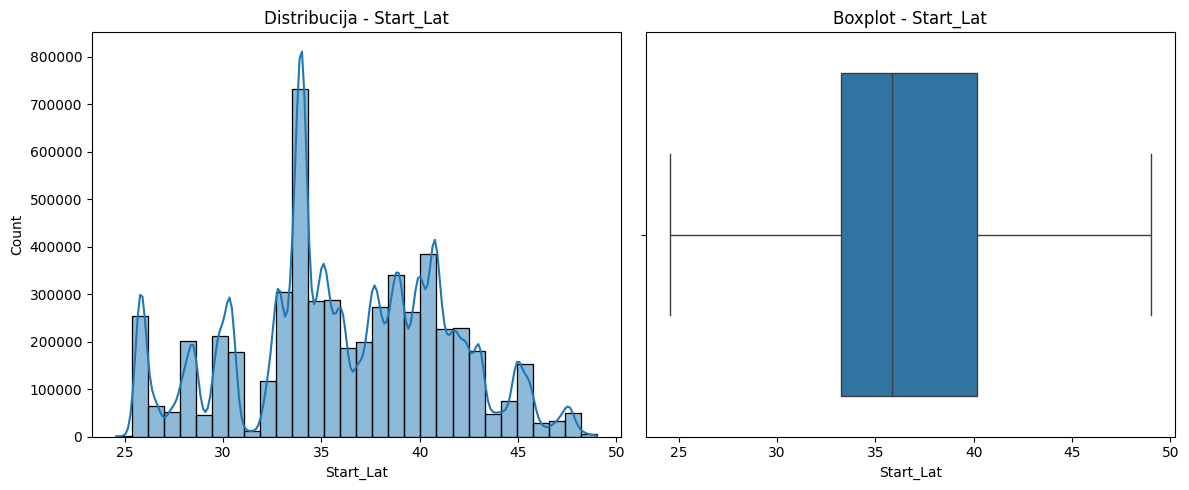

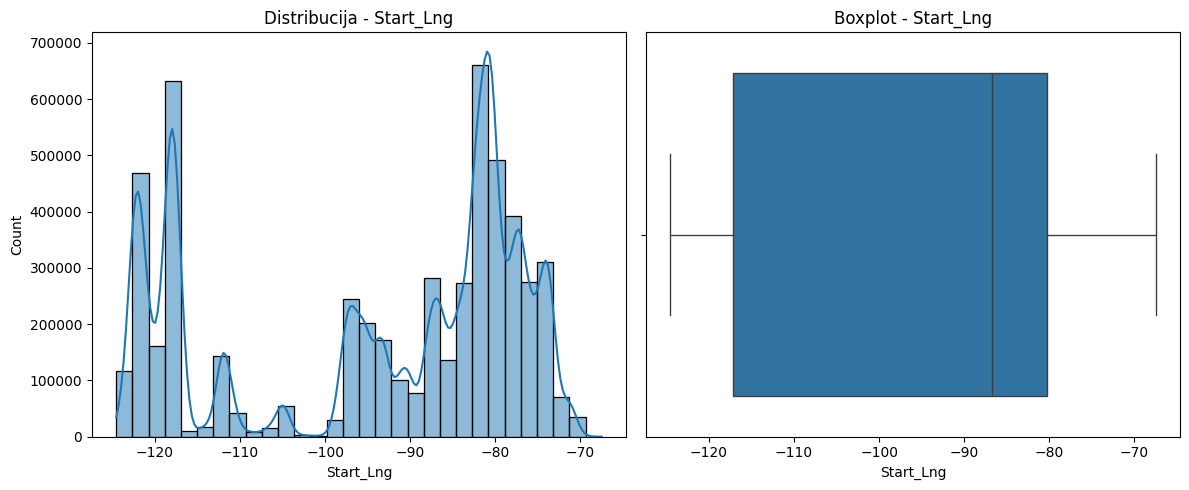

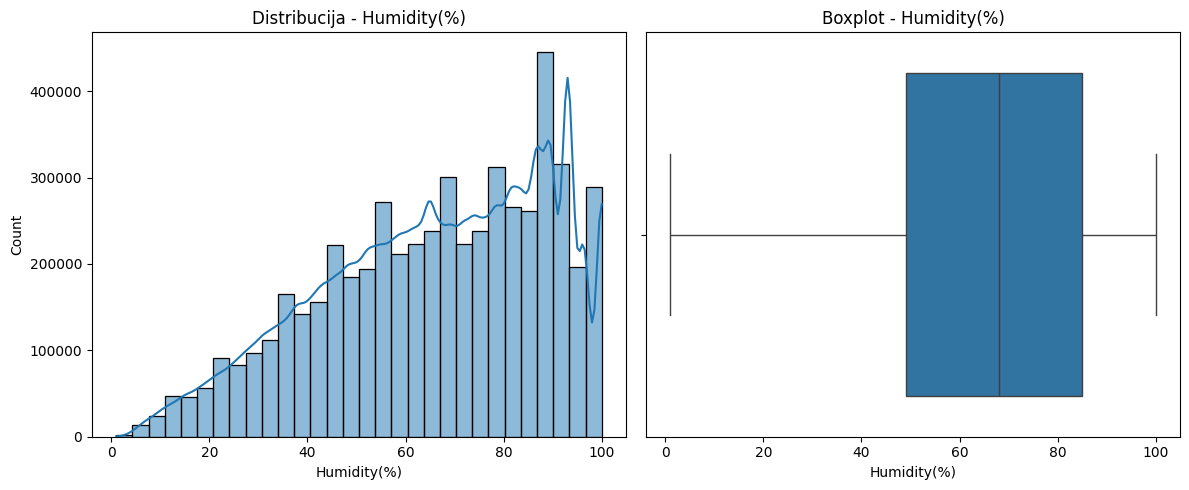

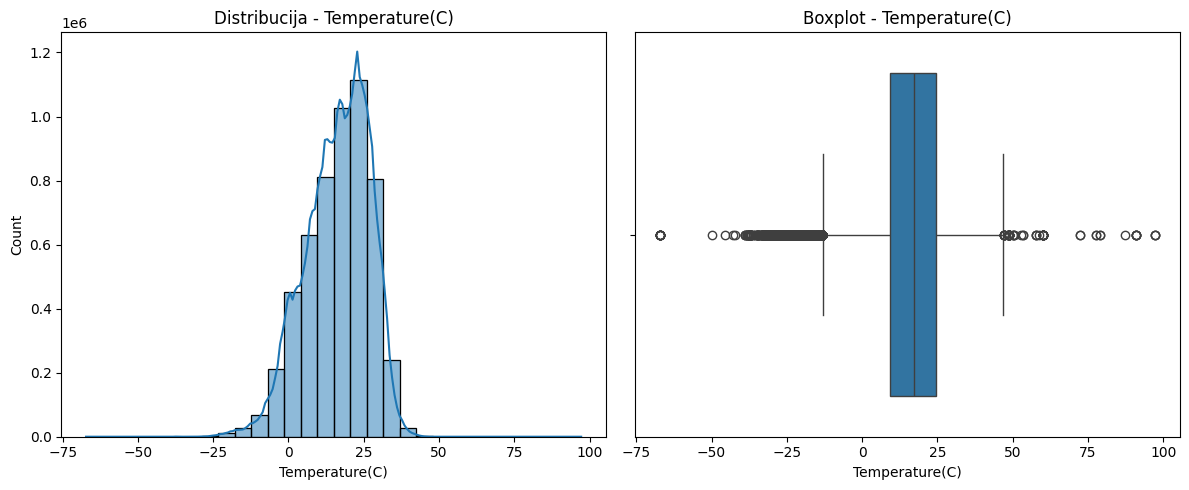

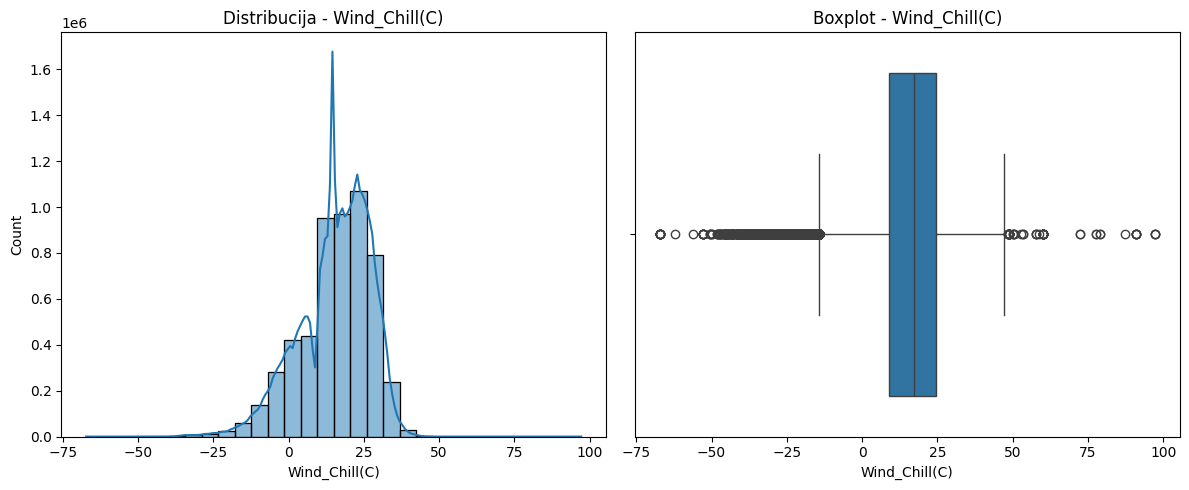

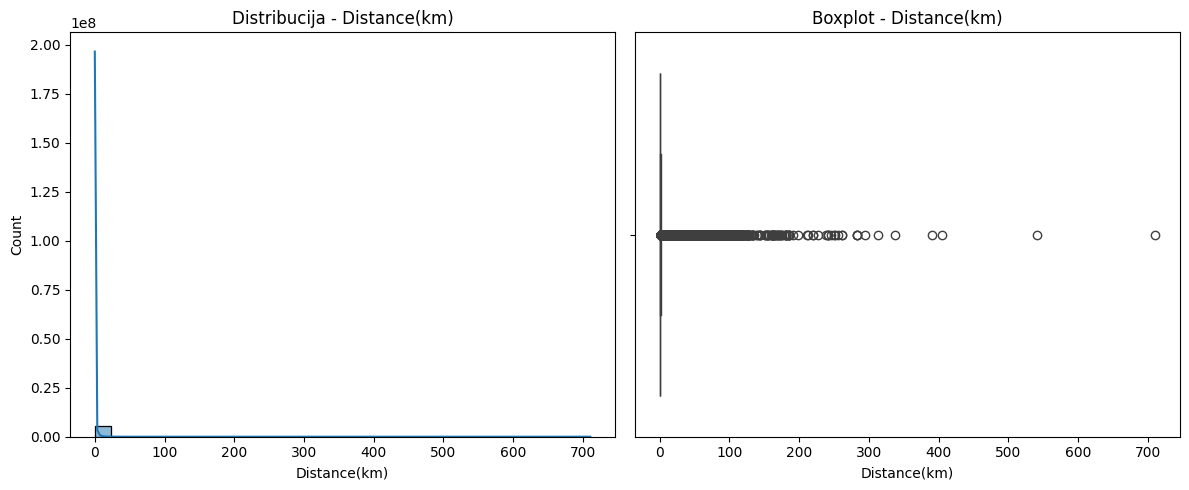

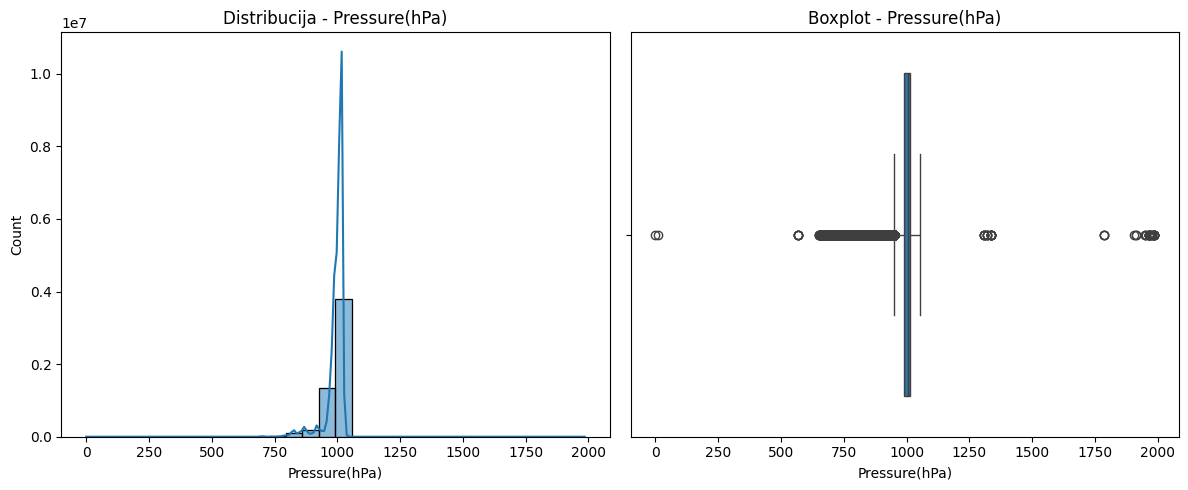

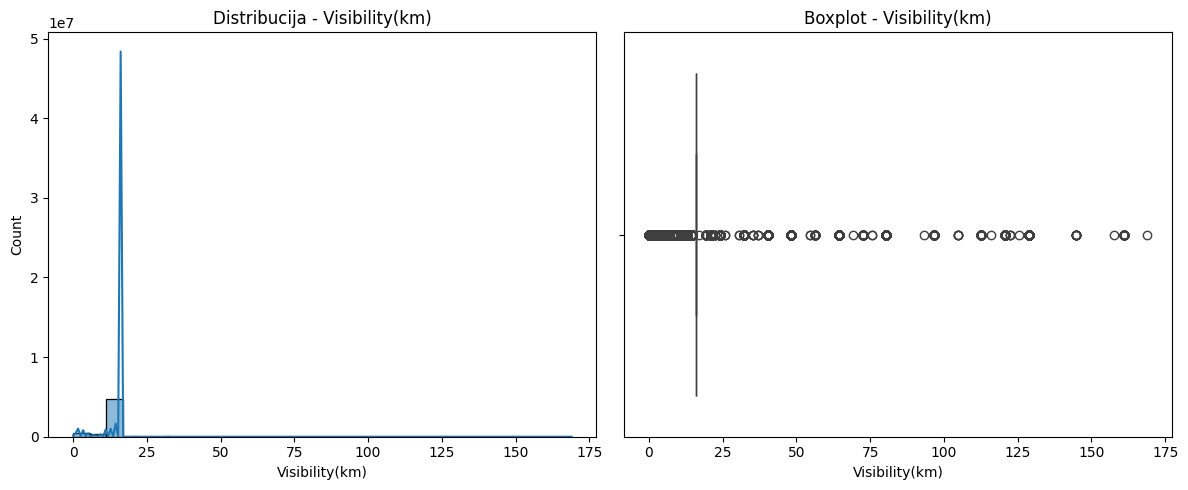

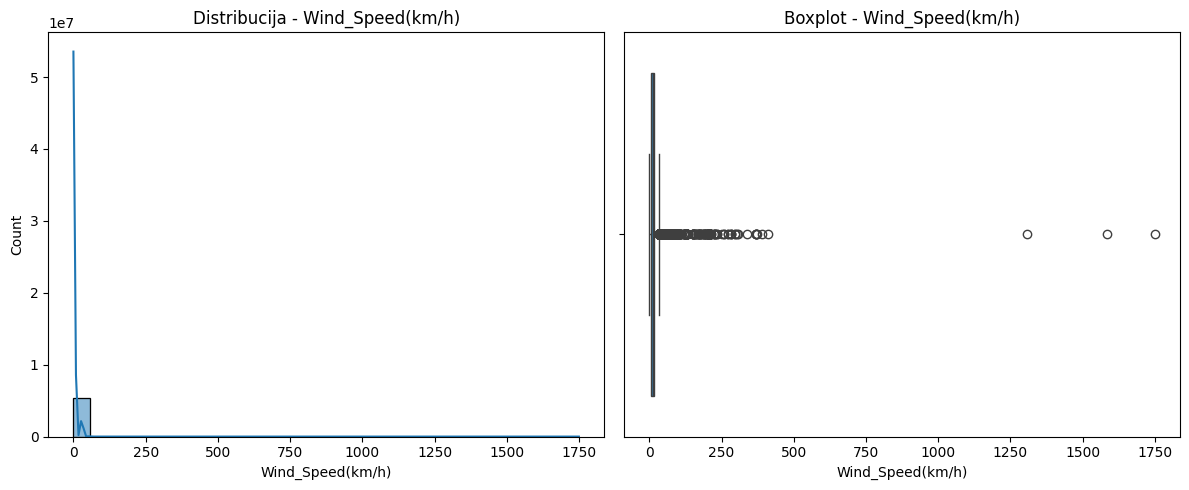

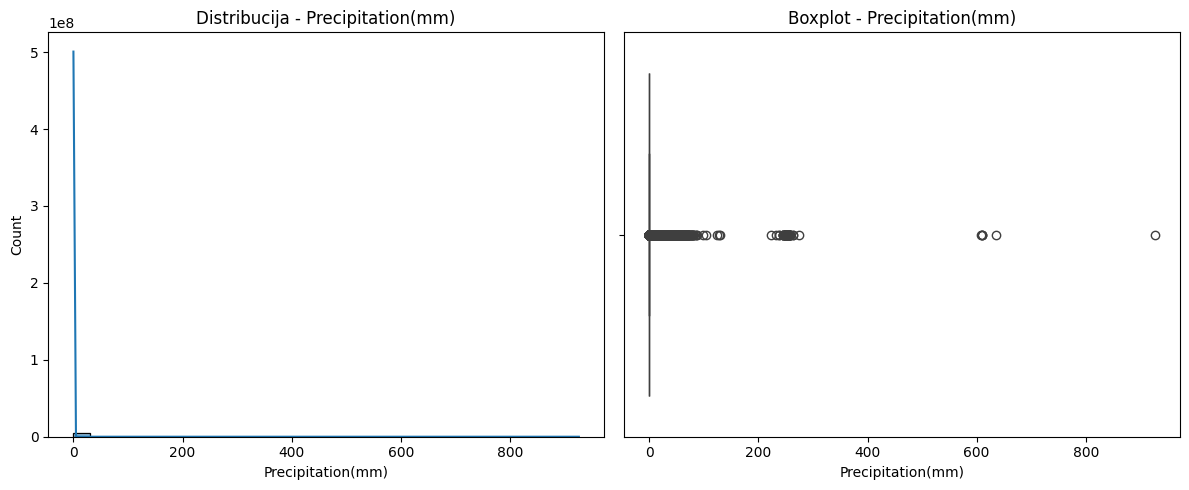

In [94]:
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df2[col], kde=True, bins=30)
    plt.title(f'Distribucija - {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df2[col])
    plt.title(f'Boxplot - {col}')
    
    plt.tight_layout()
    plt.show()

In [95]:
def detect_outliers_iqr(data, multiplier=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [96]:
# Detekcija outliera
outliers = detect_outliers_iqr(df2['Temperature(C)'])

# Grupisanje po vrednosti i broj pojavljivanja
outlier_counts = outliers.value_counts().sort_index()  # sortira po vrednosti

# Prikaz svih vrednosti
print(outlier_counts.to_string())

#min -67
#max 57


Temperature(C)
-67.22      10
-50.00       1
-45.56       1
-42.78       1
-42.22       1
-38.89       3
-38.33       5
-37.78       2
-37.22     100
-36.11       2
-35.56       2
-35.00       4
-34.44       5
-33.89       4
-33.33       5
-32.78      14
-32.22      25
-31.67       9
-31.11      24
-30.61       2
-30.56      11
-30.00      30
-29.44      26
-29.39       4
-28.89      85
-28.33      54
-27.78     111
-27.22     148
-26.67      69
-26.11     262
-25.61       5
-25.56     276
-25.28       1
-25.00     432
-24.44     313
-24.39       9
-23.89     643
-23.33     433
-23.28       2
-22.78     982
-22.22     883
-22.00       1
-21.72      20
-21.67     688
-21.11    1396
-21.00       1
-20.61      30
-20.56     930
-20.00    1501
-19.44    1403
-19.39      34
-19.00       7
-18.89    2203
-18.33    1302
-18.28      49
-18.22       1
-18.00       4
-17.78    2218
-17.28       1
-17.22    2387
-17.00      14
-16.72     165
-16.67    1652
-16.22       2
-16.11    2547
-16.00    

In [97]:
# Broj redova gde je temperatura >= 57
num_high_temp = df2[df2['Temperature(C)'] >= 57]['Temperature(C)'].count()
print("Broj ekstremnih vrednosti:", num_high_temp)

df2 = df2[df2['Temperature(C)'] < 57]  # zadrži samo temperature < 57


Broj ekstremnih vrednosti: 31


In [98]:
# Detekcija outliera
outliers = detect_outliers_iqr(df2['Wind_Chill(C)'])

# Grupisanje po vrednosti i broj pojavljivanja
outlier_counts = outliers.value_counts().sort_index()  # sortira po vrednosti

# Prikaz svih vrednosti
print(outlier_counts.to_string())

Wind_Chill(C)
-67.22      10
-62.22       1
-56.11       1
-52.78       7
-50.56       3
-50.00       2
-48.33       2
-47.78       3
-47.22       3
-47.06       2
-46.67       2
-46.44       1
-46.11       1
-45.61       3
-45.56       8
-45.00       1
-44.72       3
-44.44       4
-43.89       5
-43.33       7
-42.78       4
-42.22       4
-41.67       5
-41.11      12
-40.56      32
-40.00      41
-39.44      48
-38.89      67
-38.61       1
-38.33     111
-37.78     121
-37.56       1
-37.22     268
-36.67     216
-36.56       9
-36.50       3
-36.44       3
-36.39       1
-36.17       1
-36.11     358
-35.94       1
-35.72       1
-35.61       1
-35.56     435
-35.33       1
-35.28       1
-35.11       2
-35.00     516
-34.67       4
-34.56       1
-34.44     795
-34.39       2
-34.33       1
-34.22       3
-33.89     634
-33.78       2
-33.67       2
-33.56       1
-33.33     620
-33.22       1
-33.11       2
-33.00       2
-32.89       2
-32.78     636
-32.67       2
-32.61     

In [99]:
# Broj redova gde je temperatura < -50
num_high_temp = df2[df2['Wind_Chill(C)'] < -50]['Wind_Chill(C)'].count()
print("Broj ekstremnih vrednosti:", num_high_temp)

df2 = df2[df2['Wind_Chill(C)'] >= -50]  


Broj ekstremnih vrednosti: 22


In [100]:

# Detekcija outliera
outliers = detect_outliers_iqr(df2['Distance(km)'])

# Grupisanje po vrednosti i broj pojavljivanja
outlier_counts = outliers.value_counts().sort_index()  # sortira po vrednosti

# Prikaz svih vrednosti
print(outlier_counts.to_string())

Distance(km)
2.46      334
2.46      318
2.46      312
2.46      329
2.46      383
2.47      300
2.47      384
2.47      359
2.47      378
2.47      373
2.47      311
2.48      315
2.48      353
2.48      305
2.48      412
2.48      308
2.48      324
2.48      442
2.48      339
2.49      400
2.49      385
2.49      408
2.49      317
2.49      272
2.49      336
2.49      381
2.50      315
2.50      419
2.50      328
2.50      324
2.50      310
2.50      307
2.51      302
2.51      459
2.51      409
2.51      332
2.51      309
2.51      367
2.51      271
2.52      282
2.52      470
2.52      313
2.52      271
2.52      343
2.52      325
2.53      424
2.53      302
2.53      345
2.53      311
2.53      322
2.53      295
2.53      303
2.53      337
2.54      351
2.54      358
2.54      330
2.54      356
2.54      314
2.54      312
2.54      346
2.55      369
2.55      319
2.55      291
2.55      362
2.55      314
2.55      360
2.56      347
2.56      292
2.56      284
2.56      570
2.56   

In [101]:
# Broj redova gde je distanca >= 50
num_high_dist = df2[df2['Distance(km)'] >= 50]['Distance(km)'].count()
print("Broj ekstremnih vrednosti:", num_high_dist)

df2 = df2[df2['Distance(km)'] < 50]

Broj ekstremnih vrednosti: 1967


In [102]:
# Detekcija outliera
outliers = detect_outliers_iqr(df2['Pressure(hPa)'])

# Grupisanje po vrednosti i broj pojavljivanja
outlier_counts = outliers.value_counts().sort_index()  # sortira po vrednosti

# Prikaz svih vrednosti
print(outlier_counts.to_string())

Pressure(hPa)
0.00          1
9.82          1
565.87        1
566.20        3
569.59        1
650.53        2
651.54        2
655.61        4
655.94        3
659.67        1
661.02        8
663.73        1
665.09        1
668.81        5
671.86        1
675.25        5
677.28        1
677.96       11
678.63        1
678.97        1
679.31        6
679.99       14
680.66        1
681.00        7
681.68        5
682.36        6
683.03        5
683.37        8
683.71        3
684.05        2
684.39       23
684.73        6
685.07        4
685.41      123
685.74       16
686.08       18
686.42       11
686.76       34
687.10        7
687.44       11
687.78        8
688.11       16
688.45       17
688.79       16
689.13       13
689.47       12
689.81       57
690.15       24
690.48       96
690.82       15
691.16       23
691.50       53
691.84       24
692.18       53
692.52       40
692.86       95
693.19       95
693.53       42
693.87       39
694.21       61
694.55      110
694.89    

In [103]:
num_extreme_press = df2[(df2['Pressure(hPa)'] < 900) | (df2['Pressure(hPa)'] > 1100)]['Pressure(hPa)'].count()
print("Broj ekstremnih vrednosti:", num_extreme_press)


Broj ekstremnih vrednosti: 216146


Previse ih ima provericu na kraju

In [104]:
# Detekcija outliera
outliers = detect_outliers_iqr(df2['Visibility(km)'])

# Grupisanje po vrednosti i broj pojavljivanja
outlier_counts = outliers.value_counts().sort_index()  # sortira po vrednosti

# Prikaz svih vrednosti
print(outlier_counts.to_string())

Visibility(km)
0.00        7069
0.10         296
0.16         287
0.19        1710
0.31          31
0.32        3291
0.40       26334
0.50           3
0.61         320
0.64          15
0.80       29846
0.97          22
1.01         238
1.21       20300
1.29        4945
1.42         168
1.45           8
1.61       94391
1.77           4
1.93        3898
2.25           4
2.41        7011
2.57           4
2.90        5116
3.06           7
3.22      108524
3.54          16
4.02       11114
4.51          16
4.83       97941
5.63           8
6.44       97364
7.24           1
8.05      110516
9.66       98665
11.27     153761
12.87     111356
14.48     138122
14.63      13839
16.90          1
19.31         66
20.92       5845
22.53          5
24.14       4264
25.75          2
30.58          2
32.19       2265
35.41          4
37.01          3
40.23        508
48.28        859
54.72          2
56.33         42
64.37        906
69.20          1
72.42         57
75.64          2
80.47        433

In [105]:
num_high_vis = df2[df2['Visibility(km)'] > 50]['Visibility(km)'].count()
print("Broj ekstremnih vrednosti:", num_high_vis)

df2 = df2[df2['Visibility(km)'] <= 50]

Broj ekstremnih vrednosti: 2055


In [106]:

# Detekcija outliera
outliers = detect_outliers_iqr(df2['Wind_Speed(km/h)'])

# Grupisanje po vrednosti i broj pojavljivanja
outlier_counts = outliers.value_counts().sort_index()  # sortira po vrednosti

# Prikaz svih vrednosti
print(outlier_counts.to_string())

Wind_Speed(km/h)
33.31       2572
33.80      29415
35.24       1966
35.41      21191
37.01      17163
38.62      11178
38.95       1077
40.23       7578
40.72        822
41.84       5767
42.65        622
44.42        472
45.06       3845
46.35        311
46.67       3003
48.12        197
48.28       2157
49.89       1599
50.05        131
51.50       1150
51.82        121
53.11        838
53.75        107
55.52         61
56.33        678
57.45         36
57.94        494
59.22         44
59.55        418
61.15        325
62.76        198
62.93         13
64.37        171
64.86         13
65.98        130
66.63         13
68.56         10
69.20         86
70.33          4
70.81         83
72.26          5
72.42         45
74.03         66
75.64         24
75.96          2
77.25         26
78.86         19
82.08         20
83.69         13
85.30         12
86.90         10
88.51          5
93.34         10
94.95          2
96.56          2
98.17          5
103.00         2
106.22        

In [107]:
num_high_wind = df2[df2['Wind_Speed(km/h)'] > 211]['Wind_Speed(km/h)'].count()
print("Broj ekstremnih vrednosti:", num_high_wind)

df2 = df2[df2['Wind_Speed(km/h)'] <= 211]

Broj ekstremnih vrednosti: 32


In [108]:
# Detekcija outliera
outliers = detect_outliers_iqr(df2['Precipitation(mm)'])

# Grupisanje po vrednosti i broj pojavljivanja
outlier_counts = outliers.value_counts().sort_index()  # sortira po vrednosti

# Prikaz svih vrednosti
print(outlier_counts.to_string())

Precipitation(mm)
0.25      149016
0.51       72927
0.76       49359
1.02       36795
1.27       28849
1.52       23601
1.78       19105
2.03       15887
2.29       14082
2.54       11768
2.79       10037
3.05        8695
3.30        7689
3.56        6669
3.81        5783
4.06        5095
4.32        4668
4.57        4170
4.83        3649
5.08        3257
5.33        2935
5.59        2623
5.84        2544
6.10        2471
6.35        1952
6.60        1913
6.86        1719
7.11        1674
7.37        1291
7.62        1344
7.87        1282
8.13        1291
8.38         921
8.64         962
8.89        1002
9.14         967
9.40         775
9.65         813
9.91         772
10.16        645
10.41        585
10.67        551
10.92        454
11.18        537
11.43        486
11.68        432
11.94        458
12.19        415
12.45        372
12.70        384
12.95        382
13.21        436
13.46        324
13.72        316
13.97        326
14.22        305
14.48        248
14.73        

In [109]:
num_high_prec = df2[df2['Precipitation(mm)'] > 275]['Precipitation(mm)'].count()
print("Broj ekstremnih vrednosti:", num_high_prec)

df2 = df2[df2['Precipitation(mm)'] <= 275]

Broj ekstremnih vrednosti: 6


In [110]:
num_extreme_press = df2[(df2['Pressure(hPa)'] < 900) | (df2['Pressure(hPa)'] > 1100)]['Pressure(hPa)'].count()
print("Broj ekstremnih vrednosti:", num_extreme_press)

Broj ekstremnih vrednosti: 215020


In [111]:
mean_pressure = df2['Pressure(hPa)'].mean()
df2['Pressure(hPa)'] = df2['Pressure(hPa)'].mask((df2['Pressure(hPa)'] < 900) | (df2['Pressure(hPa)'] > 1100), mean_pressure)


In [112]:
df2.describe()

Severity  Start_Lat  Start_Lng  Humidity(%)  Temperature(C)  \
count 5423249.00 5423249.00 5423249.00   5423249.00      5423249.00   
mean        2.16      36.17     -94.07        65.68           16.32   
std         0.45       5.20      17.32        22.82           10.55   
min         1.00      24.55    -124.55         1.00          -50.00   
25%         2.00      33.26    -117.11        49.00            9.44   
50%         2.00      35.84     -86.77        68.00           17.22   
75%         2.00      40.15     -80.28        85.00           24.44   
max         4.00      49.00     -67.48       100.00           53.33   

       Wind_Chill(C)  Distance(km)  Pressure(hPa)  Visibility(km)  \
count     5423249.00    5423249.00     5423249.00      5423249.00   
mean           15.52          1.02        1000.74           14.37   
std            11.71          2.49          19.65            4.05   
min           -50.00          0.00         900.10            0.00   
25%             8.89          0.00         991.87           16.09   
50%            17.22          0.14        1006.10           16.09   
75%            24.44          0.98        1014.56           16.09   
max            53.33         50.00        1053.17           48.28   

       Wind_Speed(km/h)  Precipitation(mm)   Duration       Year      Month  \
count        5423249.00         5423249.00 5423249.00 5423249.00 5423249.00   
mean              11.95               0.21     539.77    2020.76       6.70   
std                8.74               2.59   14976.68       1.33       3.68   
min                0.00               0.00       2.00    2016.00       1.00   
25%                4.83               0.00      45.60    2020.00       3.00   
50%               11.27               0.00      78.75    2021.00       7.00   
75%               16.09               0.00     128.10    2022.00      10.00   
max              210.82             274.32 2236280.50    2023.00      12.00   

             Day    Weekday       Hour  
count 5423249.00 5423249.00 5423249.00  
mean       15.74       2.66      12.38  
std         8.66       1.83       5.58  
min         1.00       0.00       0.00  
25%         8.00       1.00       8.00  
50%        16.00       3.00      13.00  
75%        23.00       4.00      17.00  
max        31.00       6.00      23.00

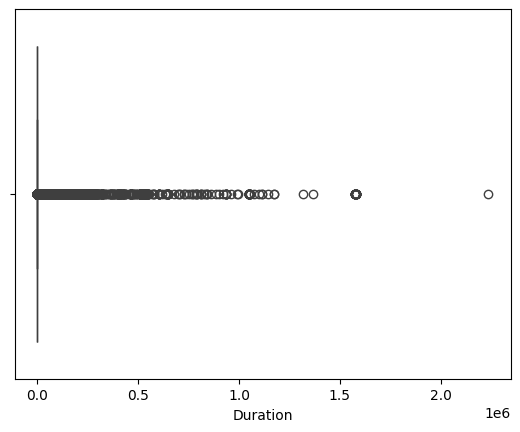

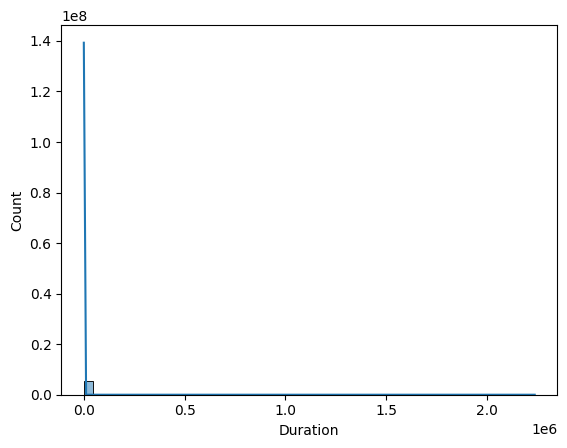

In [113]:
sns.boxplot(x=df_clean['Duration'])
plt.show()

sns.histplot(df_clean['Duration'], bins=50, kde=True)
plt.show()

In [114]:
# Detekcija outliera
outliers = detect_outliers_iqr(df2['Duration'])

# Grupisanje po vrednosti i broj pojavljivanja
outlier_counts = outliers.value_counts().sort_index()  # sortira po vrednosti

# Prikaz svih vrednosti
print(outlier_counts.to_string())

Duration
251.87           17
251.88           29
251.90           31
251.92           25
251.93           23
251.95           21
251.97           23
251.98           17
252.00          302
252.02           25
252.03           21
252.05           26
252.07           28
252.08           24
252.10           23
252.12           24
252.13           16
252.15           20
252.17           17
252.18           15
252.20           20
252.22           20
252.23           14
252.25           23
252.27           31
252.28           25
252.30           13
252.32           31
252.33           30
252.35           12
252.37           15
252.38           31
252.40           26
252.42           18
252.43           25
252.45           21
252.47            8
252.48           36
252.50          225
252.52           37
252.53           28
252.55           25
252.57           37
252.58           25
252.60           19
252.62           21
252.63           20
252.65           17
252.67           30
252.68     

In [115]:
num_high_dur = df2[df2['Duration'] > 7200]['Duration'].count()
print("Broj ekstremnih vrednosti:", num_high_dur)

df2 = df2[df2['Duration'] <= 7200]

Broj ekstremnih vrednosti: 6254


In [116]:
df2.describe()

Severity  Start_Lat  Start_Lng  Humidity(%)  Temperature(C)  \
count 5416995.00 5416995.00 5416995.00   5416995.00      5416995.00   
mean        2.16      36.17     -94.07        65.67           16.32   
std         0.45       5.20      17.33        22.82           10.55   
min         1.00      24.55    -124.55         1.00          -50.00   
25%         2.00      33.28    -117.11        49.00            9.44   
50%         2.00      35.84     -86.76        68.00           17.22   
75%         2.00      40.15     -80.27        85.00           24.44   
max         4.00      49.00     -67.48       100.00           53.33   

       Wind_Chill(C)  Distance(km)  Pressure(hPa)  Visibility(km)  \
count     5416995.00    5416995.00     5416995.00      5416995.00   
mean           15.52          1.02        1000.73           14.37   
std            11.71          2.49          19.64            4.05   
min           -50.00          0.00         900.10            0.00   
25%             8.89          0.00         991.87           16.09   
50%            17.22          0.14        1006.10           16.09   
75%            24.44          0.98        1014.56           16.09   
max            53.33         50.00        1053.17           48.28   

       Wind_Speed(km/h)  Precipitation(mm)   Duration       Year      Month  \
count        5416995.00         5416995.00 5416995.00 5416995.00 5416995.00   
mean              11.95               0.21     121.19    2020.76       6.70   
std                8.74               2.60     192.83       1.33       3.68   
min                0.00               0.00       2.00    2016.00       1.00   
25%                4.83               0.00      45.57    2020.00       3.00   
50%               11.27               0.00      78.73    2021.00       7.00   
75%               16.09               0.00     127.98    2022.00      10.00   
max              210.82             274.32    7200.00    2023.00      12.00   

             Day    Weekday       Hour  
count 5416995.00 5416995.00 5416995.00  
mean       15.74       2.66      12.38  
std         8.66       1.83       5.58  
min         1.00       0.00       0.00  
25%         8.00       1.00       8.00  
50%        16.00       3.00      13.00  
75%        23.00       4.00      17.00  
max        31.00       6.00      23.00

##### Visualisations

In [23]:
df3=df2
df3.head()

Severity  Start_Lat  Start_Lng  \
0          3      39.87     -84.06   
1          2      39.93     -82.83   
5          3      40.10     -82.93   
9          3      40.10     -82.93   
11         3      39.93     -82.83   

                                          Description          Street  \
0   Right lane blocked due to accident on I-70 Eas...          I-70 E   
1   Accident on Brice Rd at Tussing Rd. Expect del...        Brice Rd   
5   Accident on I-270 Outerbelt Northbound near Ex...  Westerville Rd   
9   Right hand shoulder blocked due to accident on...  Westerville Rd   
11  One lane blocked due to accident on I-70 Westb...          I-70 E   

            City      County State     Zipcode Country  ... Pressure(hPa)  \
0         Dayton  Montgomery    OH       45424      US  ...       1005.08   
1   Reynoldsburg    Franklin    OH  43068-3402      US  ...       1004.06   
5    Westerville    Franklin    OH       43081      US  ...       1003.39   
9    Westerville    Franklin    OH       43081      US  ...       1003.05   
11  Reynoldsburg    Franklin    OH       43068      US  ...       1003.05   

    Visibility(km) Wind_Speed(km/h) Precipitation(mm)  Duration  Year  Month  \
0            16.09            12.37              0.51    314.00  2016      2   
1            16.09            12.37              0.00     30.00  2016      2   
5            11.27             5.63              0.76     30.00  2016      2   
9             4.83             7.40              0.51     30.00  2016      2   
11            4.83             7.40              0.51     30.00  2016      2   

    Day  Weekday  Hour  
0     8        0     5  
1     8        0     6  
5     8        0     7  
9     8        0     8  
11    8        0     8  

[5 rows x 41 columns]

In [24]:
df3.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Description', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Humidity(%)',
       'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Temperature(C)', 'Wind_Chill(C)', 'Distance(km)',
       'Pressure(hPa)', 'Visibility(km)', 'Wind_Speed(km/h)',
       'Precipitation(mm)', 'Duration', 'Year', 'Month', 'Day', 'Weekday',
       'Hour'],
      dtype='object')

/var/folders/xh/dzfl0yms7r3c7x6sv8d2n0jc0000gn/T/ipykernel_24072/2417560935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


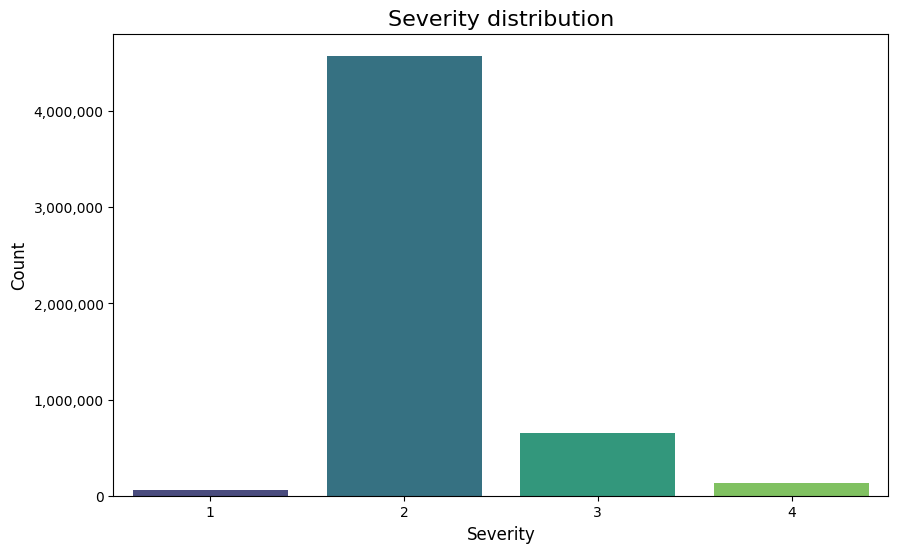

In [127]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x='Severity',
    data=df3,
    palette='viridis',
    order=sorted(df3['Severity'].unique())
    )
plt.title('Severity distribution', fontsize=16)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Namesti da y-os prikazuje "normalne" brojeve
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.savefig('severity_distribution.png')
plt.show()


/var/folders/xh/dzfl0yms7r3c7x6sv8d2n0jc0000gn/T/ipykernel_24072/3590588081.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


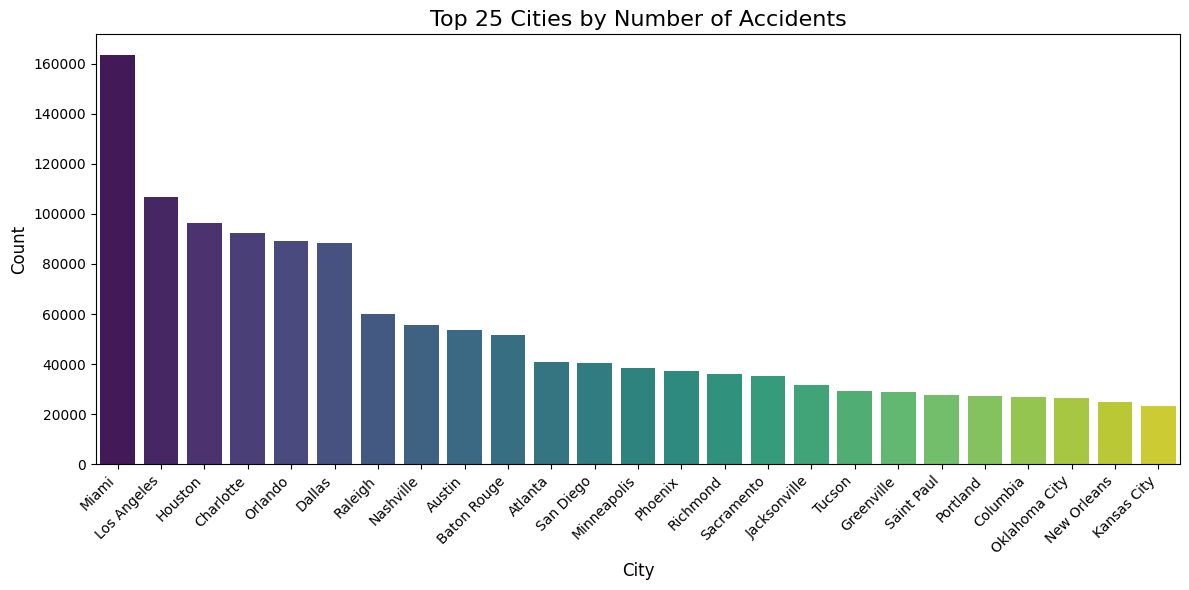

In [147]:

# top 25 gradova
top_cities = df3['City'].value_counts().nlargest(25).index

plt.figure(figsize=(12, 6))
sns.countplot(
    x='City',
    data=df3[df3['City'].isin(top_cities)],
    palette='viridis',
    order=top_cities
)
plt.title('Top 25 Cities by Number of Accidents', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Count', fontsize=12)

# rotacija x tick-ova da se lepse vide nazivi gradova
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('top25_cities.png')
plt.show()


/var/folders/xh/dzfl0yms7r3c7x6sv8d2n0jc0000gn/T/ipykernel_24072/1017503029.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


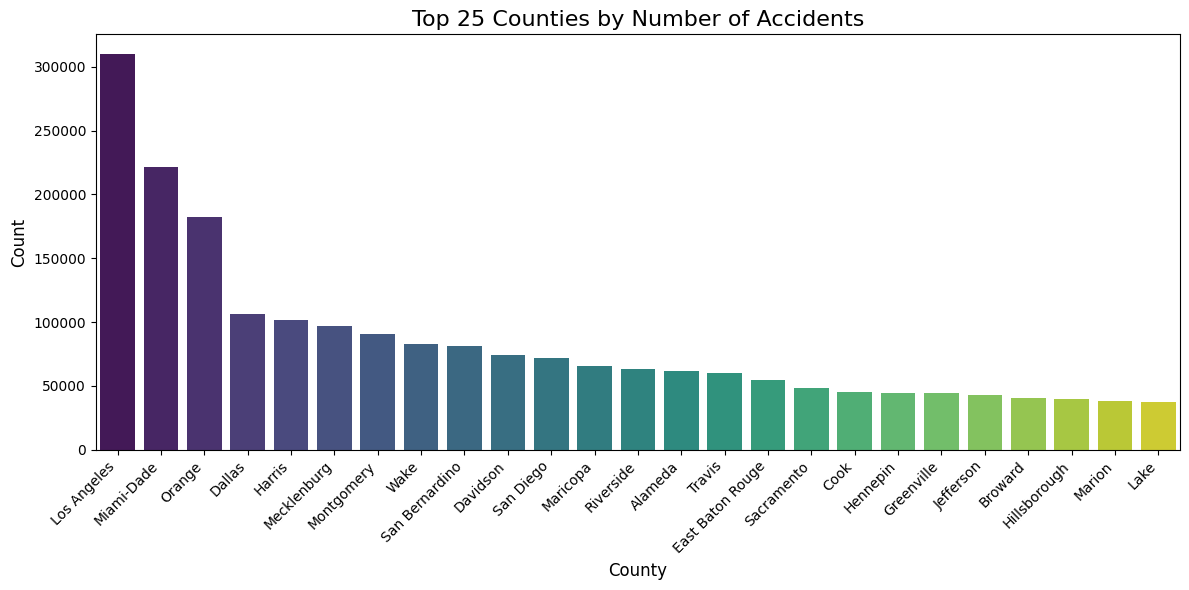

In [ ]:

# top 25 okruga
top_cities = df3['County'].value_counts().nlargest(25).index

plt.figure(figsize=(12, 6))
sns.countplot(
    x='County',
    data=df3[df3['County'].isin(top_cities)],
    palette='viridis',
    order=top_cities
)
plt.title('Top 25 Counties by Number of Accidents', fontsize=16)
plt.xlabel('County', fontsize=12)
plt.ylabel('Count', fontsize=12)

# rotacija x tick-ova da se lepse vide nazivi okruga
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('top25_counties.png')
plt.show()


/var/folders/xh/dzfl0yms7r3c7x6sv8d2n0jc0000gn/T/ipykernel_24072/1420348316.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


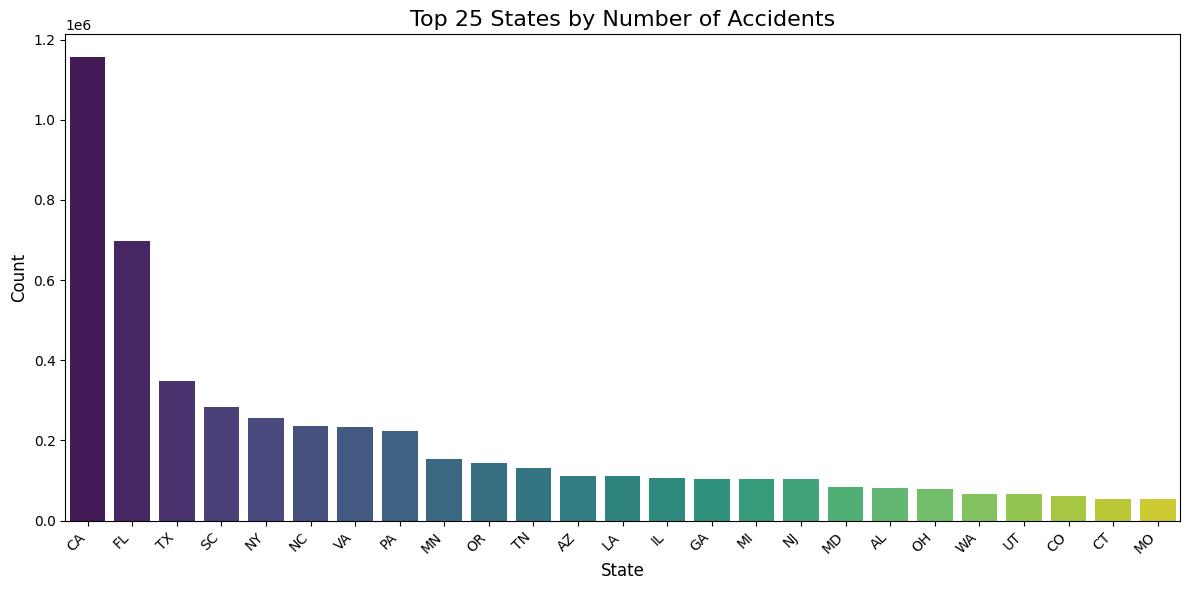

In [152]:
# top 25 gradova
top_cities = df3['State'].value_counts().nlargest(25).index

plt.figure(figsize=(12, 6))
sns.countplot(
    x='State',
    data=df3[df3['State'].isin(top_cities)],
    palette='viridis',
    order=top_cities
)
plt.title('Top 25 States by Number of Accidents', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)

# rotacija x tick-ova da se lepse vide nazivi 
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('top25_states.png')
plt.show()

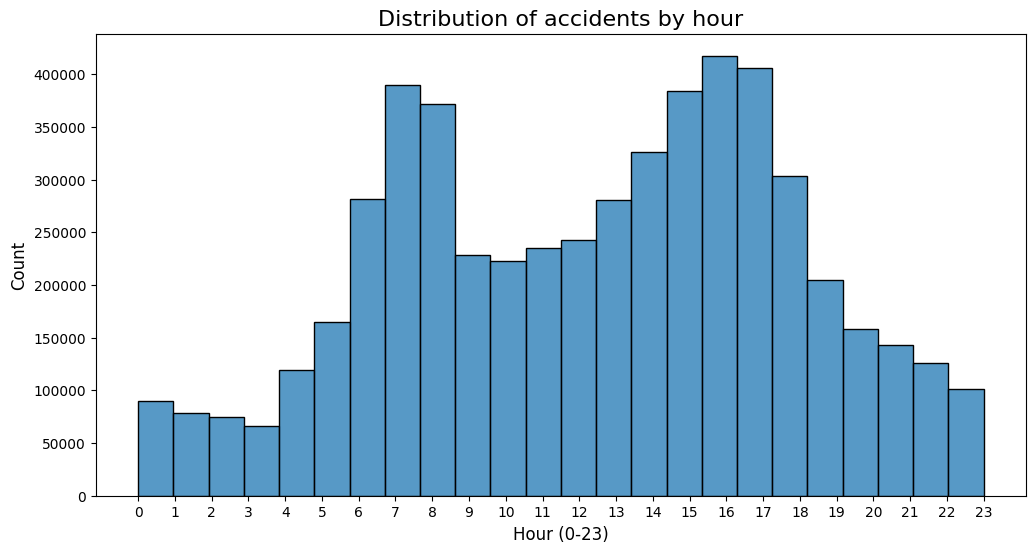

In [128]:
plt.figure(figsize=(12, 6))
sns.histplot(df3['Hour'], bins=24)
plt.title('Distribution of accidents by hour', fontsize=16)
plt.xlabel('Hour (0-23)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(0, 24))
plt.savefig('hourly_accident_distribution.png')
plt.show()

/var/folders/xh/dzfl0yms7r3c7x6sv8d2n0jc0000gn/T/ipykernel_24072/772576126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


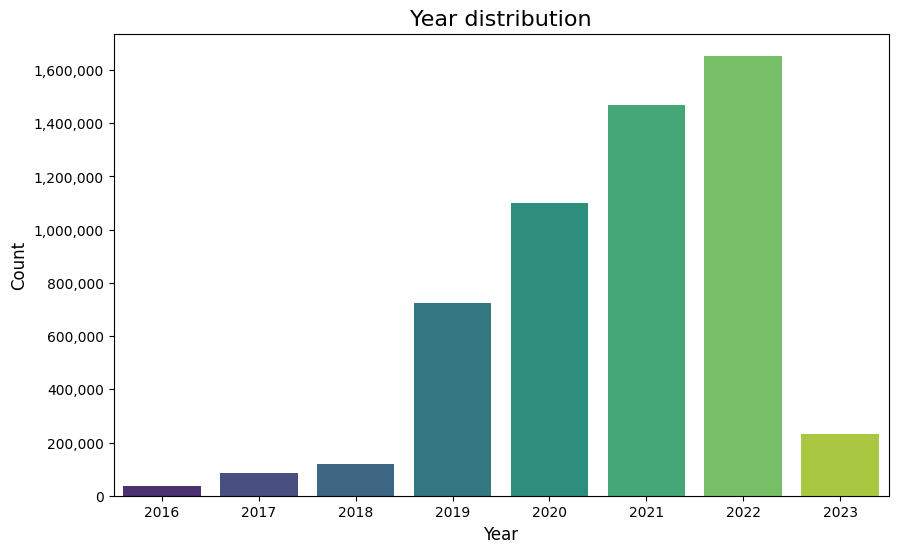

In [155]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x='Year',
    data=df3,
    palette='viridis',
    order=sorted(df3['Year'].unique())
    )
plt.title('Year distribution', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Namesti da y-os prikazuje "normalne" brojeve
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.savefig('year_distribution.png')
plt.show()

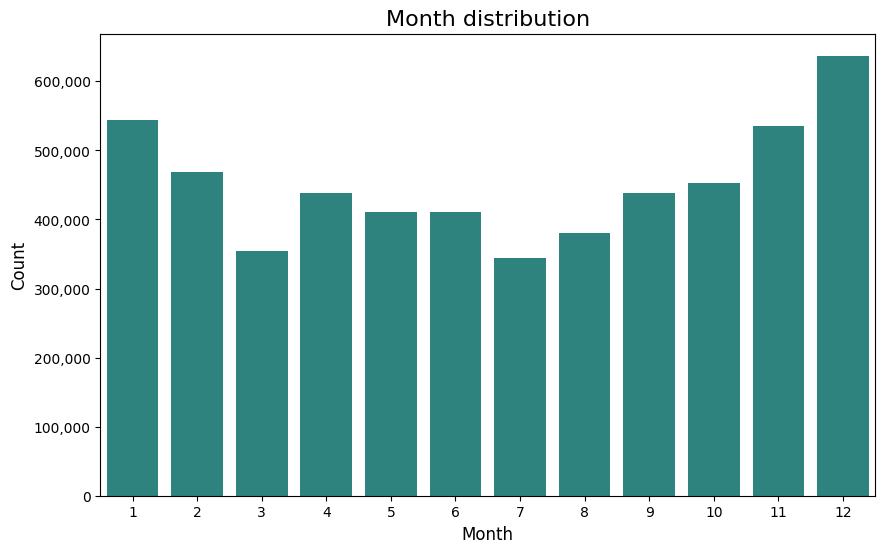

In [156]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x='Month',
    data=df3,
    hue=col,
    palette='viridis',
    order=sorted(df3['Month'].unique()),
    legend=False
    )
plt.title('Month distribution', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Namesti da y-os prikazuje "normalne" brojeve
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.savefig('month_distribution.png')
plt.show()

/var/folders/xh/dzfl0yms7r3c7x6sv8d2n0jc0000gn/T/ipykernel_24072/451650403.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


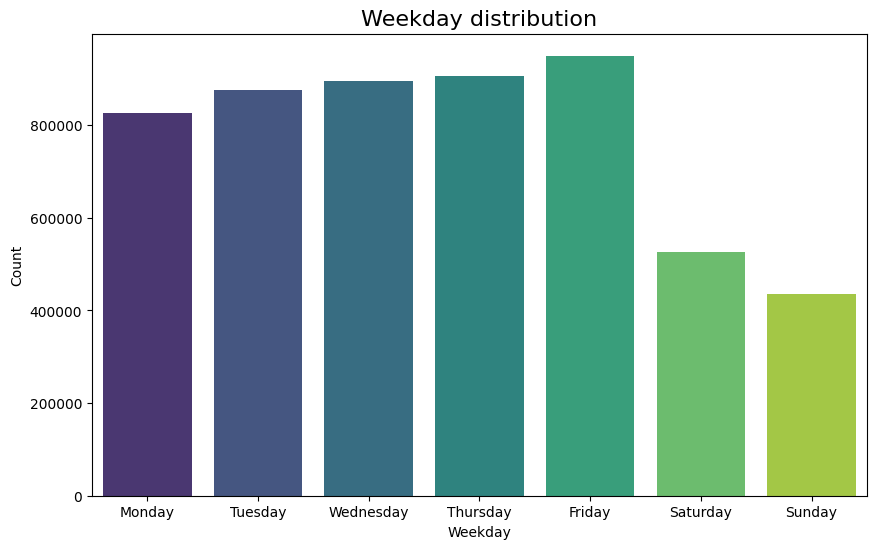

In [137]:
# mapa 0–6 u dane
weekday_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

plt.figure(figsize=(10, 6))
sns.countplot(
    x='Weekday',
    data=df3,
    palette='viridis',
    order=sorted(df3['Weekday'].unique())
)
plt.title('Weekday distribution', fontsize=16)
plt.xlabel('Weekday', fontsize=10)
plt.ylabel('Count', fontsize=10)

# zamena brojeva na x-osi imenima dana
plt.xticks(
    ticks=range(7), 
    labels=[weekday_map[i] for i in sorted(df3['Weekday'].unique())]
)

plt.savefig('weekday_distribution.png')
plt.show()


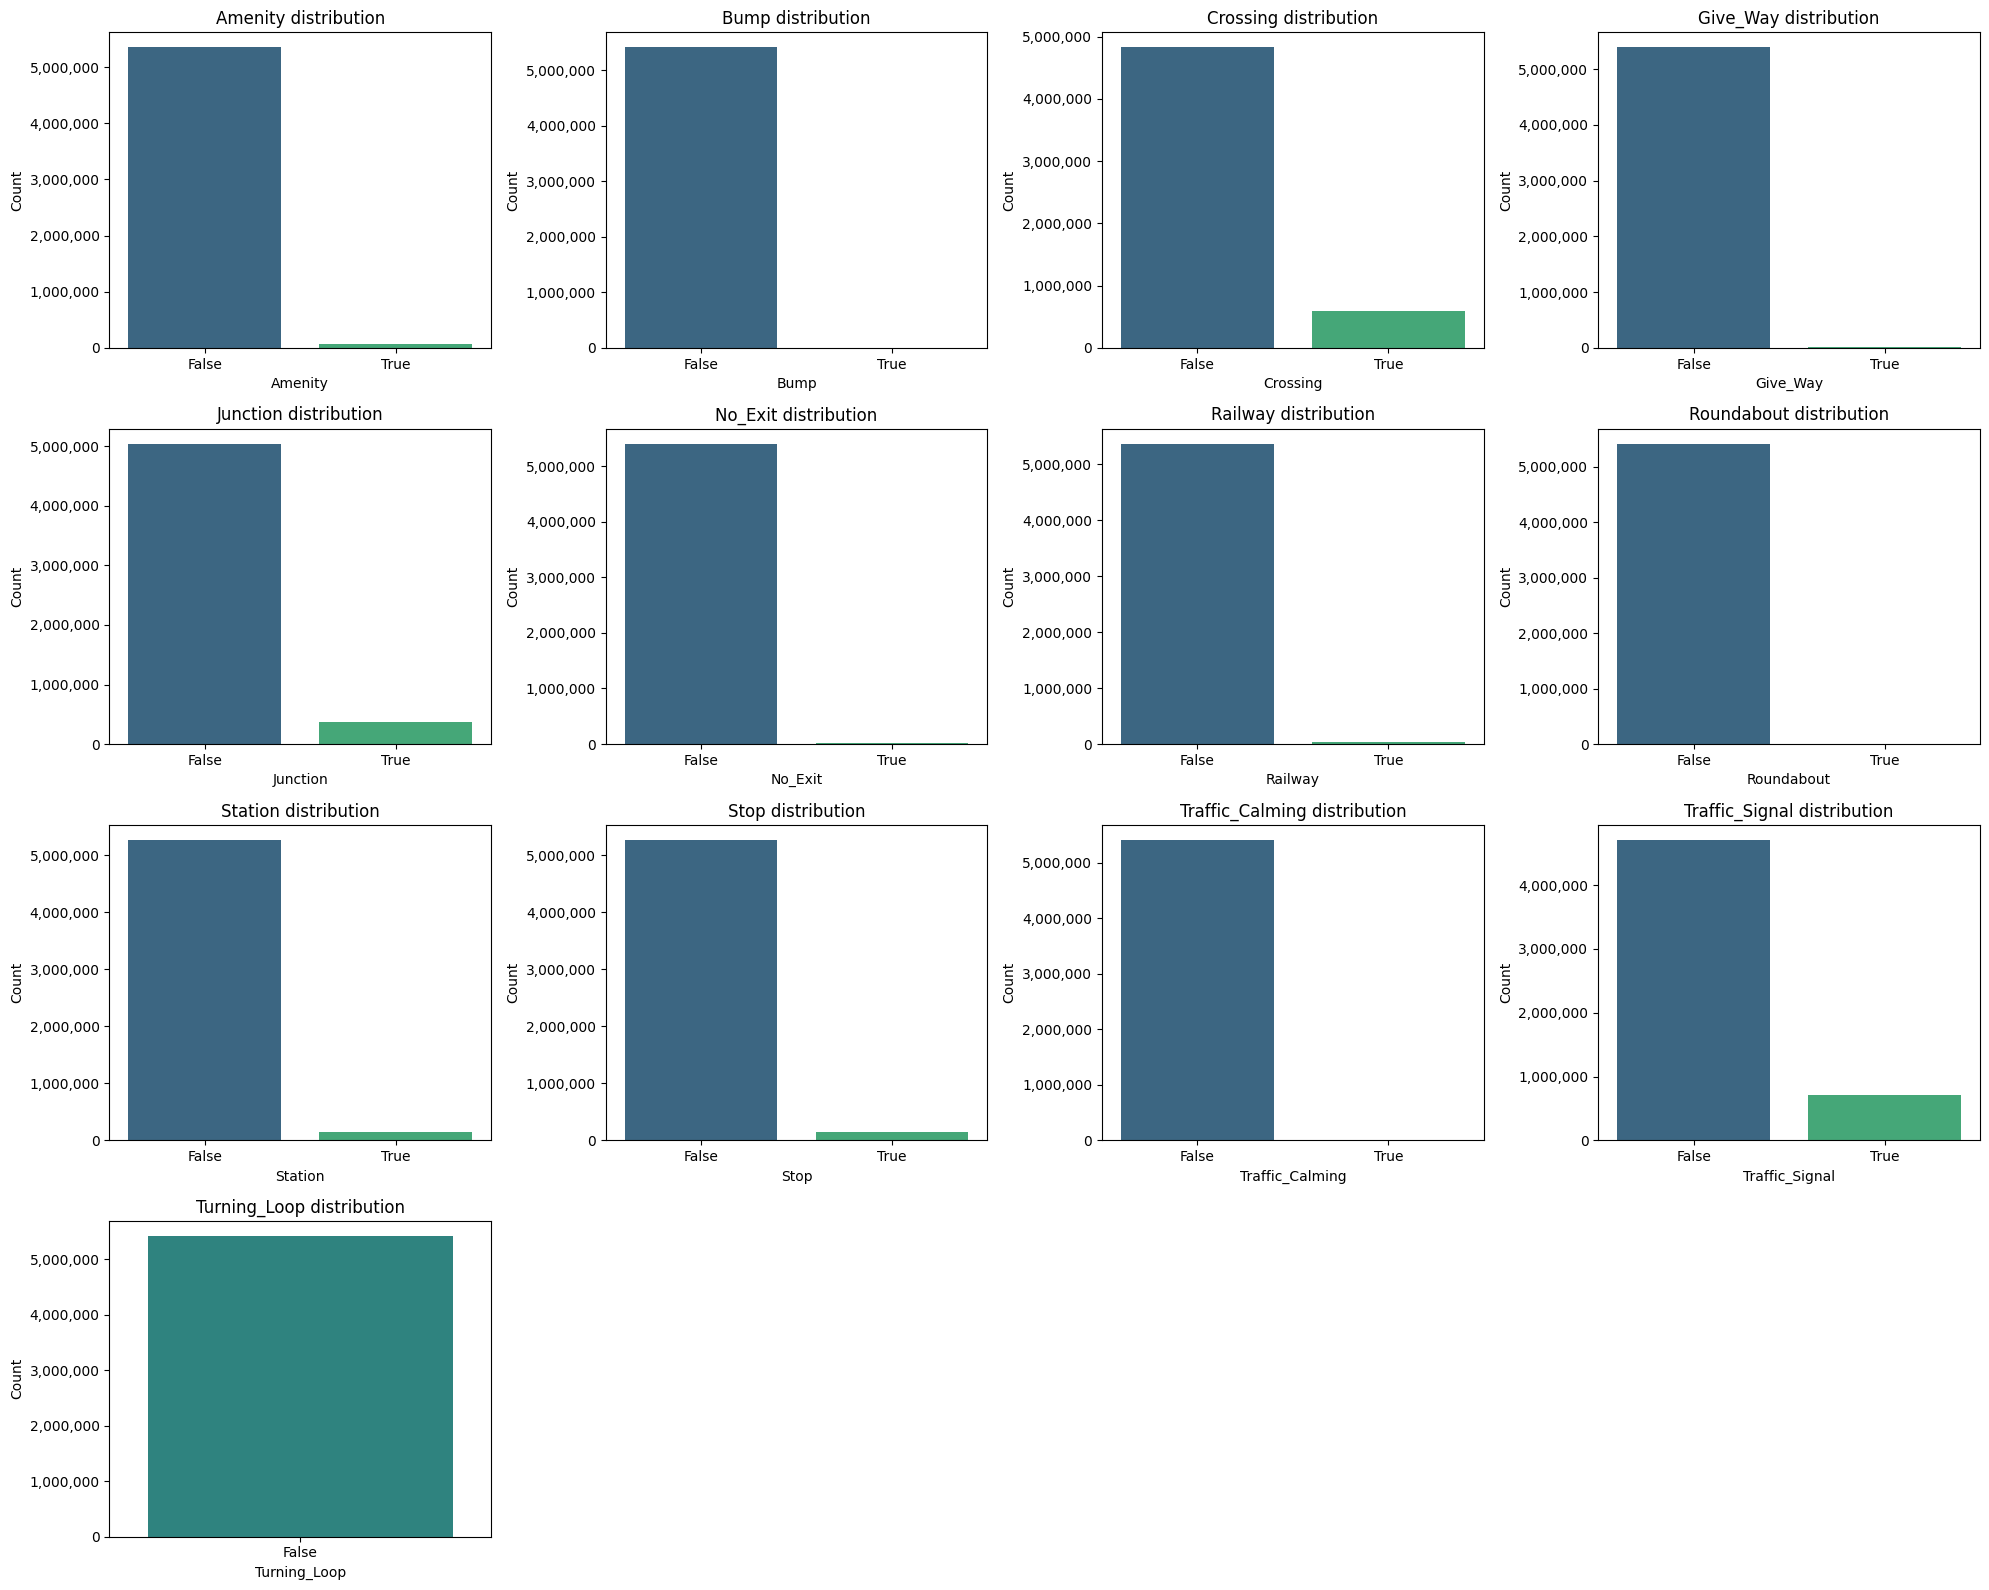

In [151]:
# lista bool kolona
bool_cols = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
    'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
    'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]

# po 4 grafa u redu
n = len(bool_cols)
cols = 4
rows = (n // cols) + (n % cols > 0)

plt.figure(figsize=(cols*5, rows*4))

for i, col in enumerate(bool_cols, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(x=col, data=df3, hue=col,palette="viridis",legend=False)
    plt.title(f'{col} distribution')
    plt.ylabel('Count')
    plt.gca().yaxis.set_major_formatter(
        mticker.FuncFormatter(lambda x, p: format(int(x), ','))
    )

plt.tight_layout()
plt.savefig("bool_columns_distribution.png")
plt.show()


##### Visualisations - multiple features

/var/folders/xh/dzfl0yms7r3c7x6sv8d2n0jc0000gn/T/ipykernel_24072/3617268203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y='Temperature(C)', data=df3, palette='coolwarm')


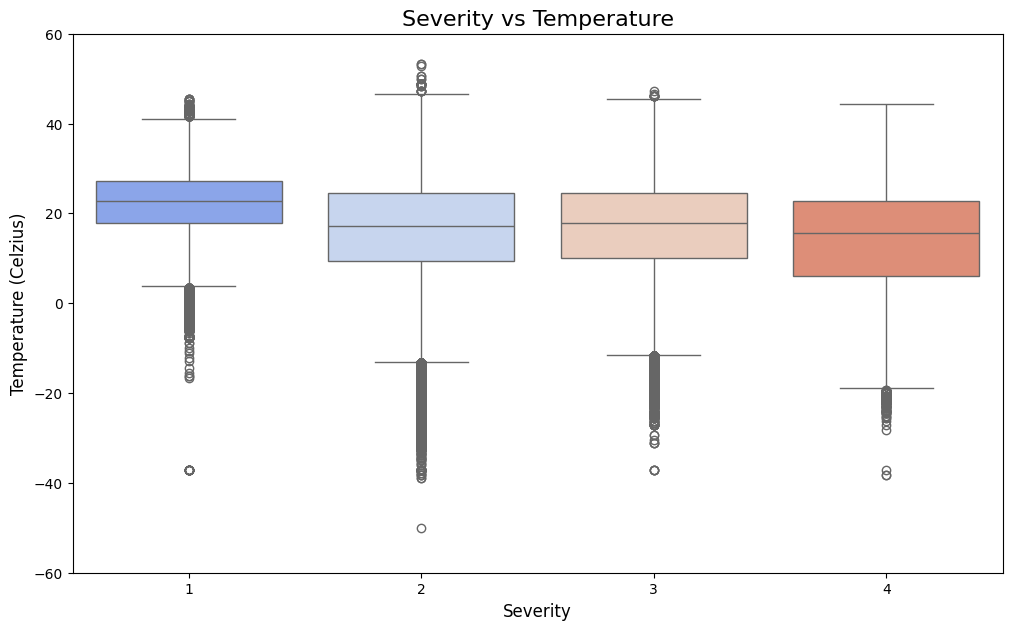

In [133]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Severity', y='Temperature(C)', data=df3, palette='coolwarm')
plt.title('Severity vs Temperature', fontsize=16)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Temperature (Celzius)', fontsize=12)
plt.ylim(-60, 60) 
plt.savefig('severity_vs_temperature.png')
plt.show()

/var/folders/xh/dzfl0yms7r3c7x6sv8d2n0jc0000gn/T/ipykernel_24072/3752185770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', y='Wind_Speed(km/h)', data=df3, palette='coolwarm')


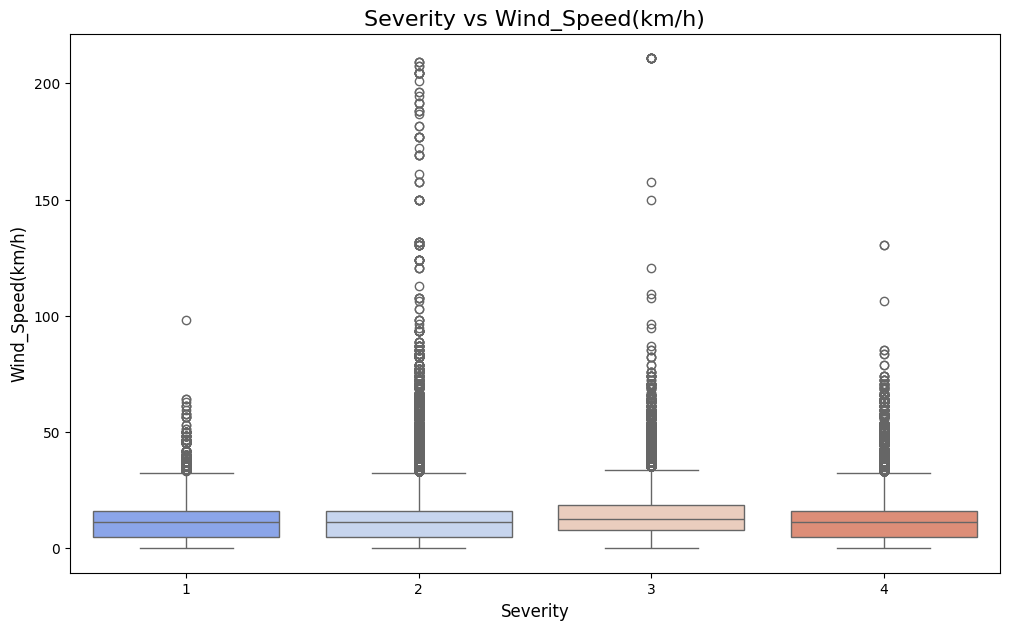

In [159]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Severity', y='Wind_Speed(km/h)', data=df3, palette='coolwarm')
plt.title('Severity vs Wind_Speed(km/h)', fontsize=16)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Wind_Speed(km/h)', fontsize=12)
plt.savefig('severity_vs_wind.png')
plt.show()

##### Heatmap and feature selection

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
categorical_cols = df3.select_dtypes(include=['object', 'bool']).columns

le = LabelEncoder()
for col in categorical_cols:
    df3[col] = le.fit_transform(df3[col])

print(f"Categorical columns: {list(categorical_cols)}")

Categorical columns: ['Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset']


In [29]:
print("\nCalculating the feature correlation matrix...")

# Select features that might be correlated with 'Severity'
selected_features = [
    'Severity', 'Start_Lat', 'Start_Lng', 'Temperature(C)', 'Humidity(%)',
    'Pressure(hPa)', 'Visibility(km)', 'Wind_Speed(km/h)', 'Duration',
    'Hour', 'Weekday', 'Month', 'Day',
    'Amenity', 'Bump', 'Crossing', 'Junction', 'Stop', 'Traffic_Signal',
    'Sunrise_Sunset', 'Weather_Condition', 'Precipitation(mm)',
    'Wind_Chill(C)', 'Distance(km)'
]

# Ensure that all selected features exist in the DataFrame
selected_features = [f for f in selected_features if f in df3.columns]

corr_matrix = df3[selected_features].corr()

print(f"Correlation matrix shape: {corr_matrix.shape}")



Calculating the feature correlation matrix...
Correlation matrix shape: (24, 24)


Drawing the feature correlation heatmap...


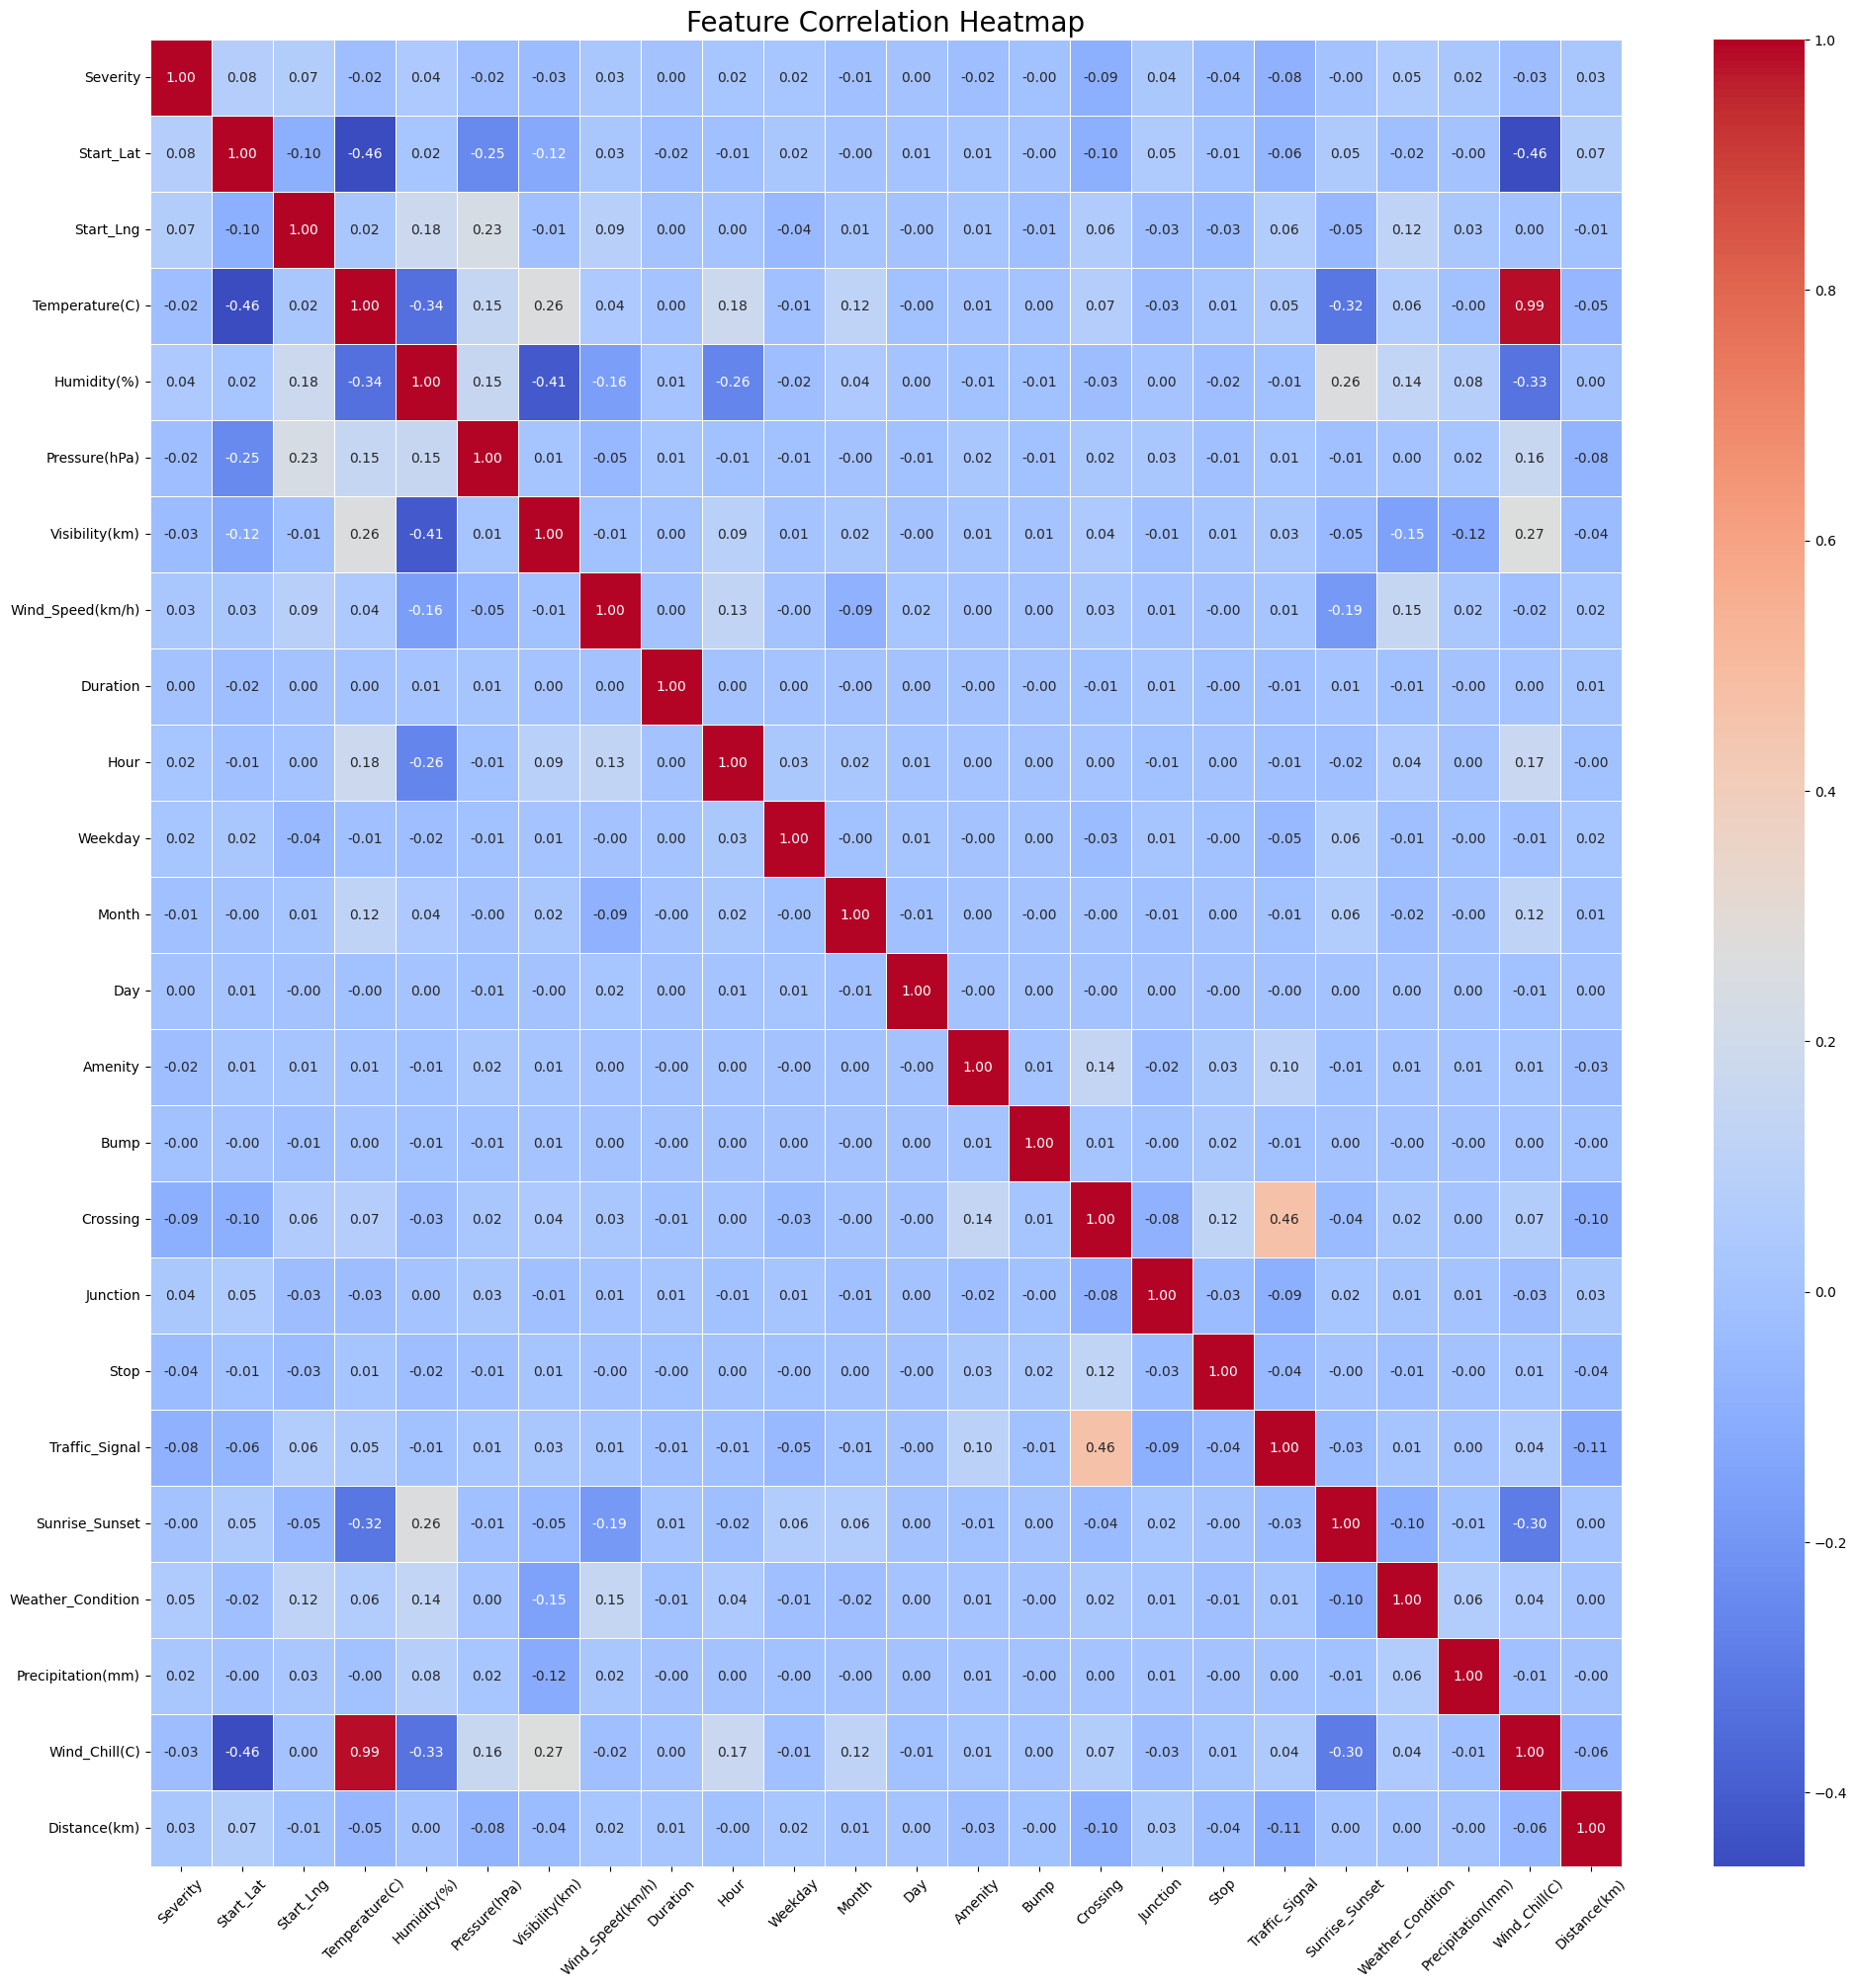

In [30]:
print("Drawing the feature correlation heatmap...")
plt.figure(figsize=(24, 24))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Feature Correlation Heatmap', fontsize=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig('feature_correlation_heatmap.png')
plt.show()


Severity nema jaku linearnu korelaciju ni sa jednom pojedinačnom osobinom (sve korelacije su < 0.1).
Nijedna pojedinačna varijabla ne objašnjava ozbiljnost nesreće, već je potrebno koristiti više osobina zajedno i nelinearne modele (npr. Random Forest, XGBoost).

Humidity(%) ima malu negativnu korelaciju sa Hour (-0.26). Odnosno što je kasniji sat u danu, obično je manja vlažnost vazduha (npr. popodne je suvlje nego rano ujutro).

Traffic_Signal i Crossing su jako povezani (0.46) i mogu doprineti multikolinearnosti. Odnosno semafori se često nalaze blizu pešačkih prelaza, pa obe kolone daju sličnu informaciju te je moguće ukloniti jednu. 


Slično je i za Temperature i Wind_Chill (0.99), Start_Lat i Temperature (-0.46), Humidity i Visibility (-0.41).

Kolone Duration, Day, Amenity, Bump, Sunrise_Sunset imaju 0.00 korelaciju te se mogu izbaciti jer neće doprineti predikciji.

In [31]:
df3=df3.drop(columns=['Traffic_Signal','Duration', 'Day', 'Amenity', 'Bump', 'Sunrise_Sunset','Wind_Chill(C)','Visibility(km)'])

In [32]:
df3.head()

Severity  Start_Lat  Start_Lng  Description  Street   City  County  State  \
0          3      39.87     -84.06      2251588  197945   2431    1050     33   
1          2      39.93     -82.83       168958  156387   8498     556     33   
5          3      40.10     -82.93       319581  278440  11002     556     33   
9          3      40.10     -82.93      2173581  278440  11002     556     33   
11         3      39.93     -82.83      2095435  197945   8498     556     33   

    Zipcode  Country  ...  Turning_Loop  Temperature(C)  Distance(km)  \
0    364222        0  ...             0            2.72          0.02   
1    350616        0  ...             0            3.28          0.02   
5    350776        0  ...             0            3.28          0.02   
9    350776        0  ...             0            3.00          0.02   
11   350587        0  ...             0            3.00          0.02   

    Pressure(hPa)  Wind_Speed(km/h)  Precipitation(mm)  Year  Month  Weekday  \
0         1005.08             12.37               0.51  2016      2        0   
1         1004.06             12.37               0.00  2016      2        0   
5         1003.39              5.63               0.76  2016      2        0   
9         1003.05              7.40               0.51  2016      2        0   
11        1003.05              7.40               0.51  2016      2        0   

    Hour  
0      5  
1      6  
5      7  
9      8  
11     8  

[5 rows x 33 columns]

In [34]:
print("\nFeature Selection Step...")

# Define features (X) and target (y)
X = df3.drop('Severity', axis=1)
y = df3['Severity']

# Safety check: ensure all features are numeric
non_numeric_cols = X.select_dtypes(include=['object', 'bool']).columns
if len(non_numeric_cols) > 0:
    print(f"Warning: Found non-numeric features: {list(non_numeric_cols)}. Encoding them now...")
    for col in non_numeric_cols:
        X[col] = LabelEncoder().fit_transform(X[col])

print("\nFeature selection completed.")
print(f"Final number of features: {X.shape[1]}")
print(f"Feature list: {X.columns.tolist()}")

# Save features and target for the modeling stage
X.to_csv('features.csv', index=False)
y.to_csv('target.csv', index=False)


Feature Selection Step...

Feature selection completed.
Final number of features: 32
Feature list: ['Start_Lat', 'Start_Lng', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Humidity(%)', 'Wind_Direction', 'Weather_Condition', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Turning_Loop', 'Temperature(C)', 'Distance(km)', 'Pressure(hPa)', 'Wind_Speed(km/h)', 'Precipitation(mm)', 'Year', 'Month', 'Weekday', 'Hour']


#### Models

##### Training models

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.metrics import (accuracy_score, f1_score, classification_report,
                           precision_score, recall_score, cohen_kappa_score,
                           matthews_corrcoef, log_loss)

In [36]:
X = pd.read_csv('features.csv')
y = pd.read_csv('target.csv').squeeze()

Train-test split - 70% train

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Define and train models

In [38]:
models = {
    "Logistic regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

In [39]:
results = {}

for name, model in models.items():
    print(f"--- Model: {name} ---")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    weighted_precision = precision_score(y_test, y_pred, average='weighted')
    weighted_recall = recall_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    loss = log_loss(y_test, y_pred_proba)
    
    results[name] = {
        'Accuracy': accuracy,
        'Weighted F1': weighted_f1,
        'Precision': weighted_precision,
        'Recall': weighted_recall,
        "Cohen's Kappa": kappa,
        'MCC': mcc,
        'Log Loss': loss 
    }
    
    print(f"{name} - Accuracy: {accuracy:.4f}")
    print(f"{name} - Weighted F1: {weighted_f1:.4f}")
    print(f"{name} - Kappa: {kappa:.4f}")
    print(f"{name} - MCC: {mcc:.4f}")
    print(f"{name} - Log Loss: {loss:.4f}")
    
    print("Report:")
    print(classification_report(y_test, y_pred))


--- Model: Logistic regression ---


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic regression - Accuracy: 0.8446
Logistic regression - Weighted F1: 0.7735
Logistic regression - Kappa: 0.0000
Logistic regression - MCC: 0.0000
Logistic regression - Log Loss: 0.5132
Report:


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     18744
           2       0.84      1.00      0.92   1375239
           3       0.00      0.00      0.00    194978
           4       0.00      0.00      0.00     39248

    accuracy                           0.84   1628209
   macro avg       0.21      0.25      0.23   1628209
weighted avg       0.71      0.84      0.77   1628209

--- Model: Decision tree ---
Decision tree - Accuracy: 0.9287
Decision tree - Weighted F1: 0.9226
Decision tree - Kappa: 0.7048
Decision tree - MCC: 0.7140
Decision tree - Log Loss: 0.1959
Report:
              precision    recall  f1-score   support

           1       0.85      0.56      0.68     18744
           2       0.94      0.98      0.96   1375239
           3       0.84      0.71      0.77    194978
           4       0.97      0.32      0.48     39248

    accuracy                           0.93   1628209
   macro avg       0.90      0.64      0.7

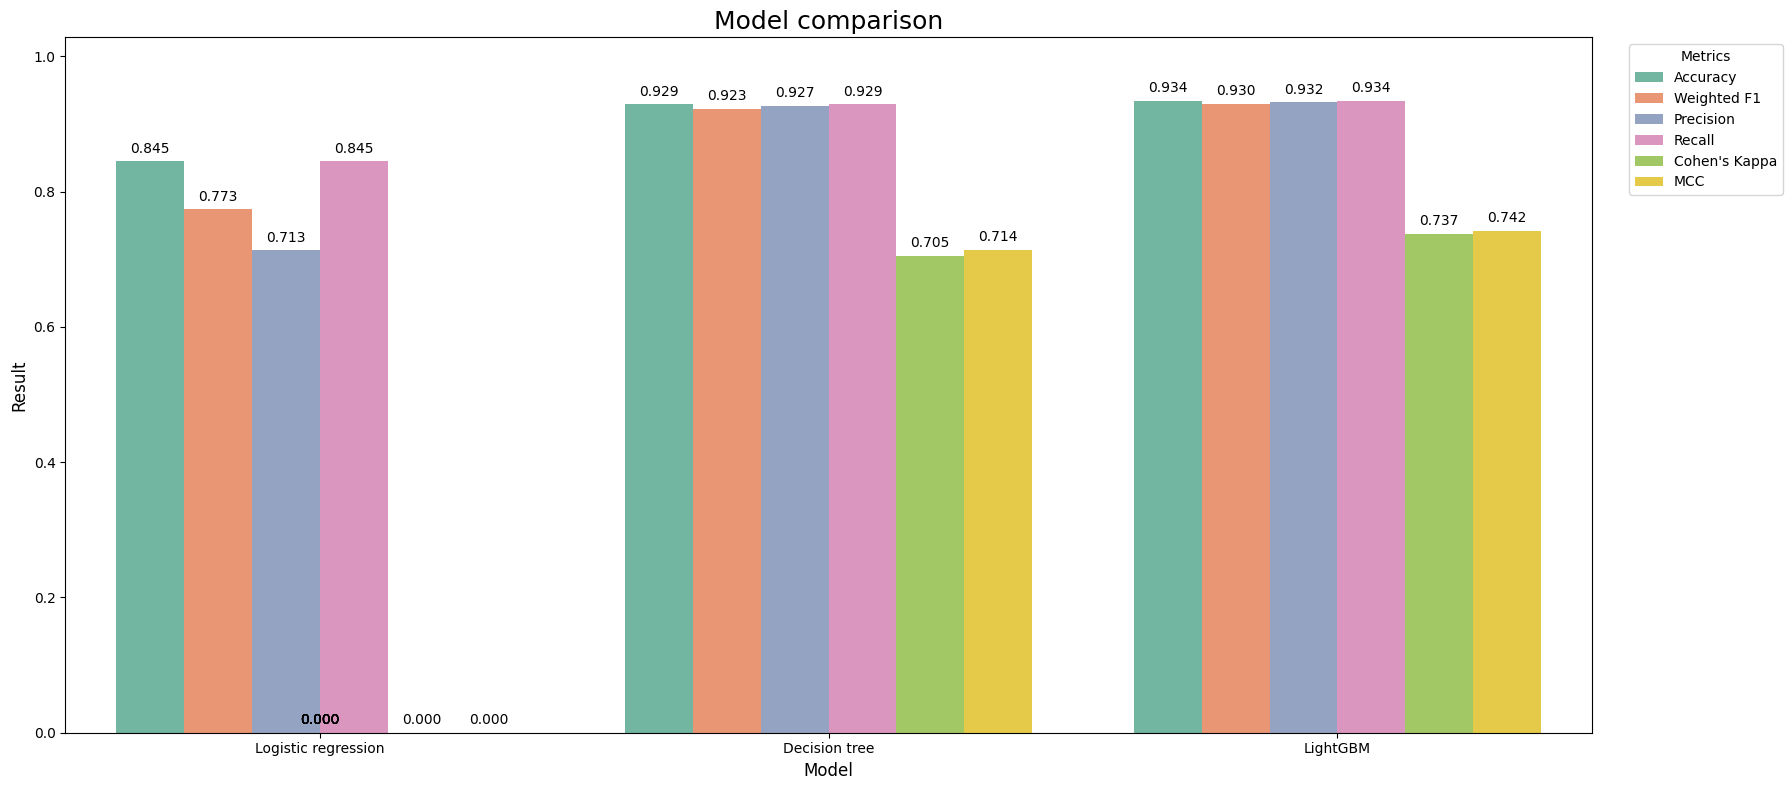

In [45]:
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

higher_is_better_metrics = ['Accuracy', 'Weighted F1', 'Precision', 'Recall', "Cohen's Kappa", 'MCC']
results_melted_h = pd.melt(results_df, id_vars='Model', value_vars=higher_is_better_metrics, var_name='Metric', value_name='Score')

plt.figure(figsize=(18, 8))
ax1 = sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted_h, palette='Set2')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=10)

plt.title('Model comparison', fontsize=18)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Result', fontsize=12)
plt.ylim(0, max(1.0, results_melted_h['Score'].max() * 1.1))
plt.legend(title='Metrics', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('model_comparison_scores.png')
plt.show()

/var/folders/xh/dzfl0yms7r3c7x6sv8d2n0jc0000gn/T/ipykernel_91380/430561513.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Score', data=results_melted_l, palette='plasma')


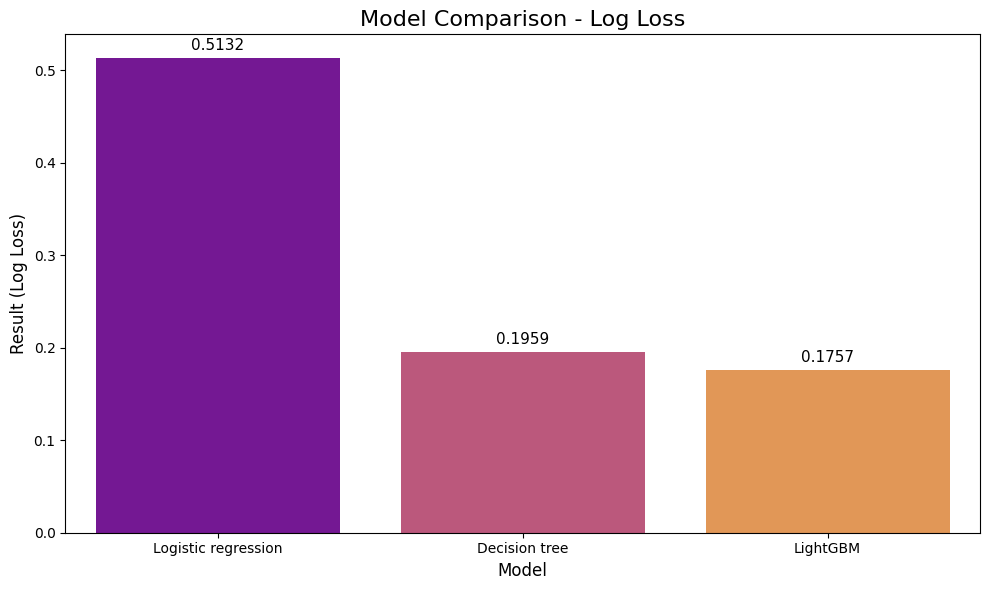

In [ ]:
# Log Loss
lower_is_better_metrics = ['Log Loss']
results_melted_l = pd.melt(results_df, id_vars='Model', value_vars=lower_is_better_metrics, var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='Model', y='Score', data=results_melted_l, palette='plasma')

for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=11)

plt.title('Model Comparison - Log Loss', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Result (Log Loss)', fontsize=12)
plt.tight_layout()
plt.savefig('model_comparison_logloss.png')
plt.show()

Save best model

In [47]:
import joblib
joblib.dump(models['LightGBM'], 'lightgbm_model.pkl')
print("LightGBM saved as lightgbm_model.pkl")

LightGBM saved as lightgbm_model.pkl


#### Stacking

In [2]:
from sklearn.ensemble import StackingClassifier

In [6]:
X = pd.read_csv('features.csv')
y = pd.read_csv('target.csv').squeeze()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [7]:
models = {
    "Logistic regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Weighted F1': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        "Cohen's Kappa": cohen_kappa_score(y_test, y_pred),
        'MCC': matthews_corrcoef(y_test, y_pred),
        'Log Loss': log_loss(y_test, y_pred_proba)
    }

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.073606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2940
[LightGBM] [Info] Number of data points in the train set: 3799153, number of used features: 30
[LightGBM] [Info] Start training from score -4.464385
[LightGBM] [Info] Start training from score -0.168853
[LightGBM] [Info] Start training from score -2.122350
[LightGBM] [Info] Start training from score -3.725331


In [8]:
print("\n--- Meta and base models ---")
results_df_for_ranking = pd.DataFrame(results).T
results_df_for_ranking = results_df_for_ranking.sort_values(by='Weighted F1', ascending=False)

sorted_model_names = results_df_for_ranking.index.tolist()

meta_model_name = sorted_model_names[0]
base_model_names = sorted_model_names[1:3]

meta_model = models[meta_model_name]
base_learners = [(name, models[name]) for name in base_model_names]

print(f"Meta Learner: {meta_model_name}")
print(f"Base Learners: {base_model_names}")


--- Meta and base models ---
Meta Learner: LightGBM
Base Learners: ['Decision tree', 'Logistic regression']


Stacking model

In [9]:
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5,
    passthrough=False,  # passthrough=False meta model koristi samo predikcije base modela, ne originalne feature-e
    n_jobs=-1
)
stacking_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2018
[LightGBM] [Info] Number of data points in the train set: 3799153, number of used features: 8
[LightGBM] [Info] Start training from score -4.464385
[LightGBM] [Info] Start training from score -0.168853
[LightGBM] [Info] Start training from score -2.122350
[LightGBM] [Info] Start training from score -3.725331


StackingClassifier(cv=5,
                   estimators=[('Decision tree',
                                DecisionTreeClassifier(max_depth=10,
                                                       random_state=42)),
                               ('Logistic regression',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42))],
                   final_estimator=LGBMClassifier(random_state=42), n_jobs=-1)

Evaluation stacking model

In [10]:
y_pred_stacking = stacking_model.predict(X_test)
y_pred_proba_stacking = stacking_model.predict_proba(X_test)

results['Stacking'] = {
    'Accuracy': accuracy_score(y_test, y_pred_stacking),
    'Weighted F1': f1_score(y_test, y_pred_stacking, average='weighted'),
    'Precision': precision_score(y_test, y_pred_stacking, average='weighted'),
    'Recall': recall_score(y_test, y_pred_stacking, average='weighted'),
    "Cohen's Kappa": cohen_kappa_score(y_test, y_pred_stacking),
    'MCC': matthews_corrcoef(y_test, y_pred_stacking),
    'Log Loss': log_loss(y_test, y_pred_proba_stacking)
}
print(f"Stacking model - F1: {results['Stacking']['Weighted F1']:.4f}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Stacking model - F1: 0.9171


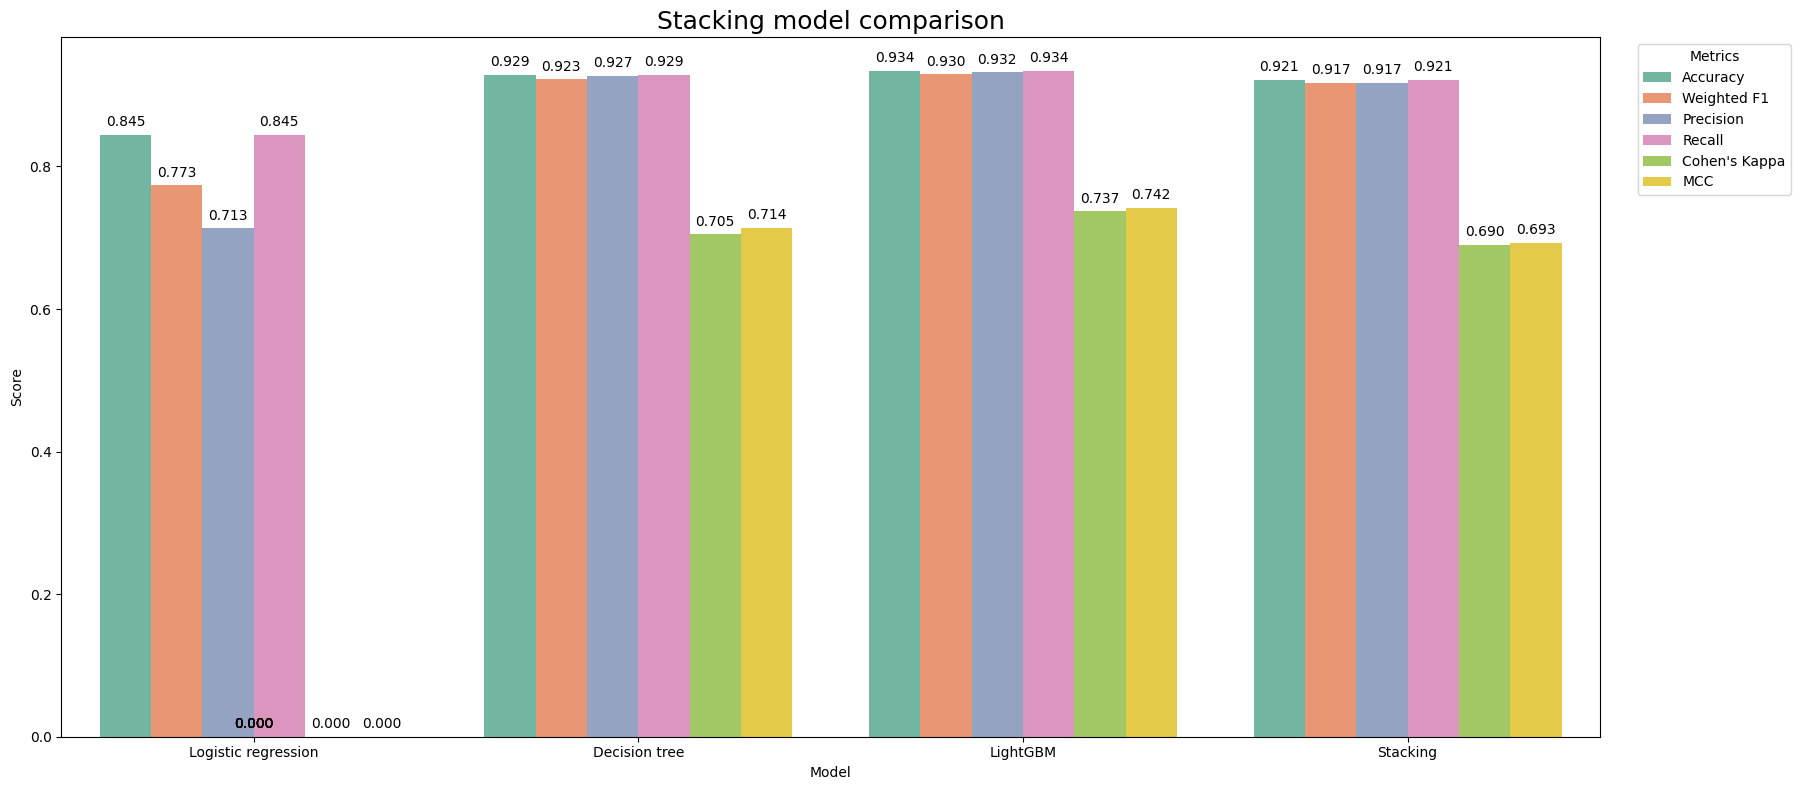

In [13]:
final_results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

higher_is_better_metrics = ['Accuracy', 'Weighted F1', 'Precision', 'Recall', "Cohen's Kappa", 'MCC']
results_melted_h = pd.melt(final_results_df, id_vars='Model', value_vars=higher_is_better_metrics, var_name='Metric', value_name='Score')

plt.figure(figsize=(18, 8))
ax1 = sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted_h, palette='Set2')
ax1.set_title('Stacking model comparison', fontsize=18)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=10)
plt.tight_layout(rect=[0, 0, 0.9, 1]) 
plt.legend(title='Metrics', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

/var/folders/xh/dzfl0yms7r3c7x6sv8d2n0jc0000gn/T/ipykernel_1132/2845155154.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Score', data=results_melted_l, palette='plasma')


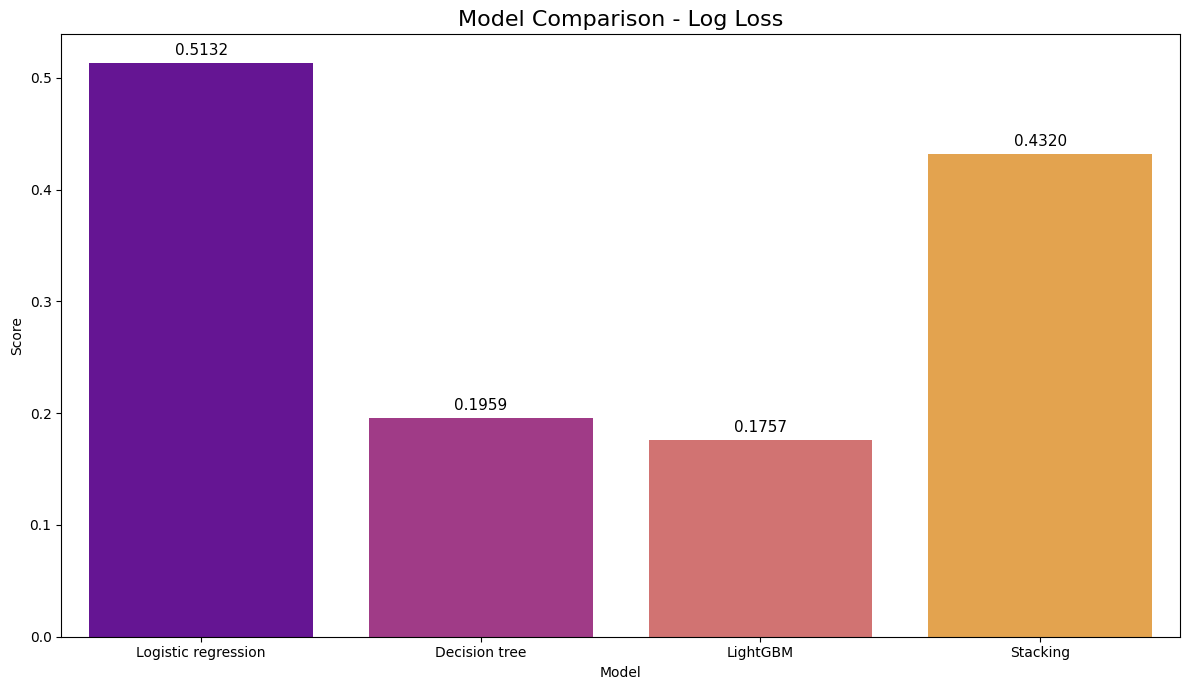

In [12]:
lower_is_better_metrics = ['Log Loss']
results_melted_l = pd.melt(final_results_df, id_vars='Model', value_vars=lower_is_better_metrics, var_name='Metric', value_name='Score')
plt.figure(figsize=(12, 7))
ax2 = sns.barplot(x='Model', y='Score', data=results_melted_l, palette='plasma')
ax2.set_title('Model Comparison - Log Loss', fontsize=16)
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=11)
plt.tight_layout()
plt.show()

In [15]:
import joblib
joblib.dump(stacking_model, 'stacking_model_final.pkl')
print("Stacking model saved as stacking_model_final.pkl")

Stacking model saved as stacking_model_final.pkl


#### SHAP

In [21]:
import shap

Load best model


In [ ]:
lgbm_model = joblib.load('lightgbm_model.pkl')

In [17]:
X = pd.read_csv('features.csv')
y = pd.read_csv('target.csv').squeeze()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"For SHAP analysis we use {len(X_test)} test data")

For SHAP analysis we use 1628209 test data


Calculating SHAP values

In [22]:
explainer = shap.TreeExplainer(lgbm_model)

# SHAP vrednosti za test set
# Za multiclass problem, shap_values je lista matrica, po jedna matrica za svaku klasu
shap_values = explainer.shap_values(X_test)

In [23]:
# Checking type and dimensions SHAP values
print(f"Type of SHAP values: {type(shap_values)}")
if isinstance(shap_values, list):
    print(f"Number of elements in list (dimensions): {len(shap_values)}")
    print(f"SHAP dimension for one class: {shap_values[0].shape}")
else:
    print(f"SHAP matrix dimension: {shap_values.shape}")

print(f"Dim test: {X_test.shape}")

Type of SHAP values: <class 'numpy.ndarray'>
SHAP matrix dimension: (1628209, 32, 4)
Dim test: (1628209, 32)


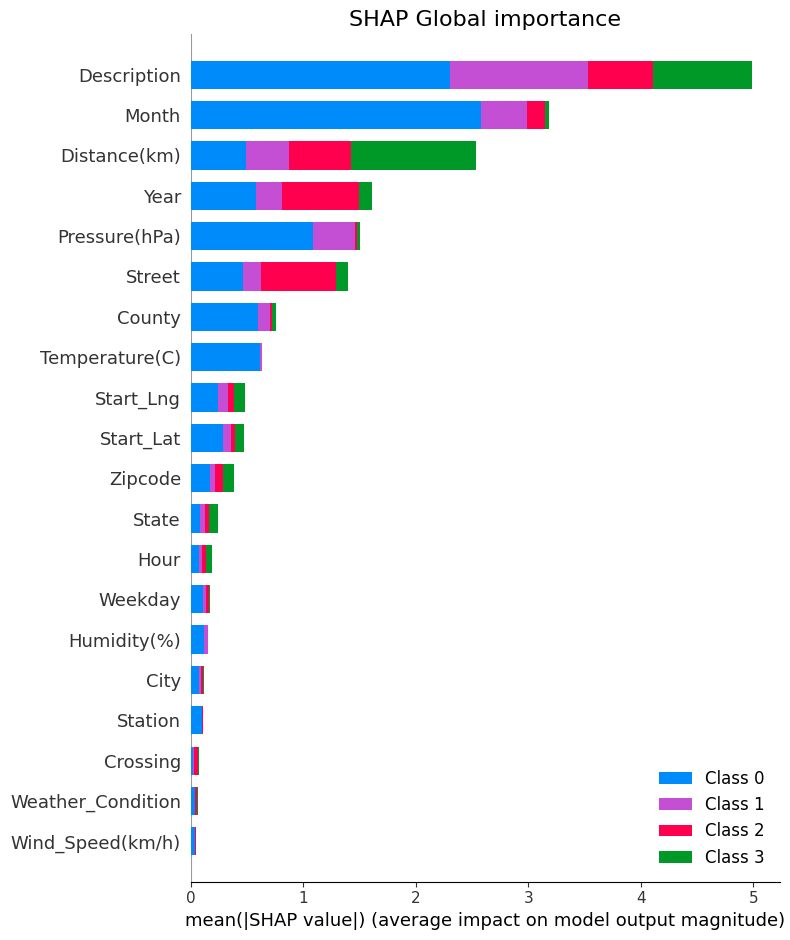

--- SHAP plot for Severity = 1 ---


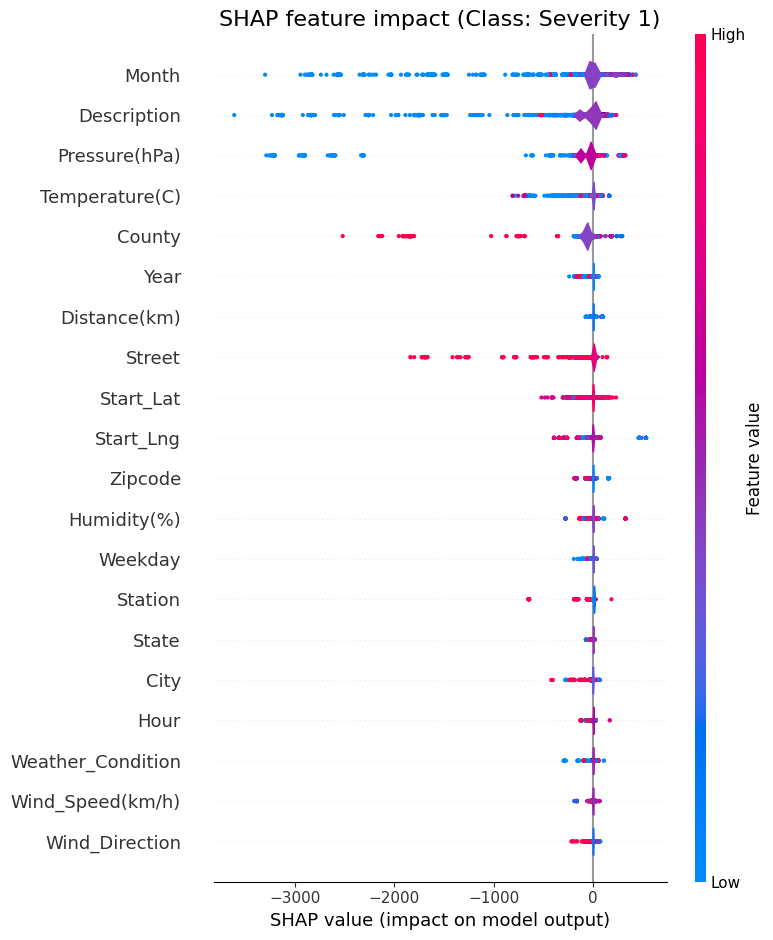

--- SHAP plot for Severity = 2 ---


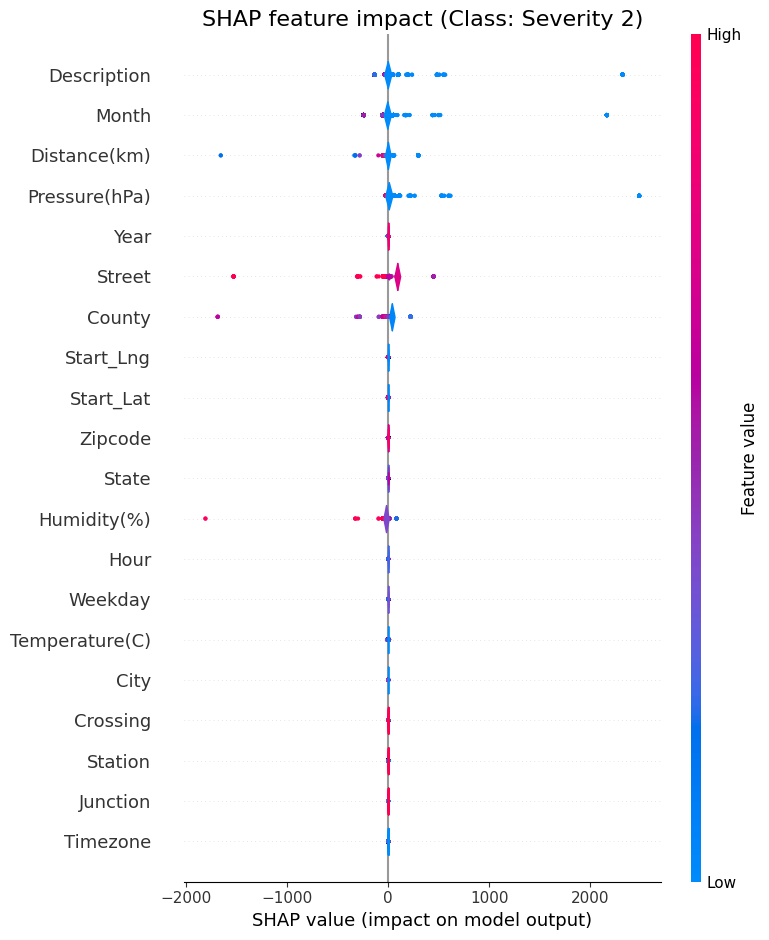

--- SHAP plot for Severity = 3 ---


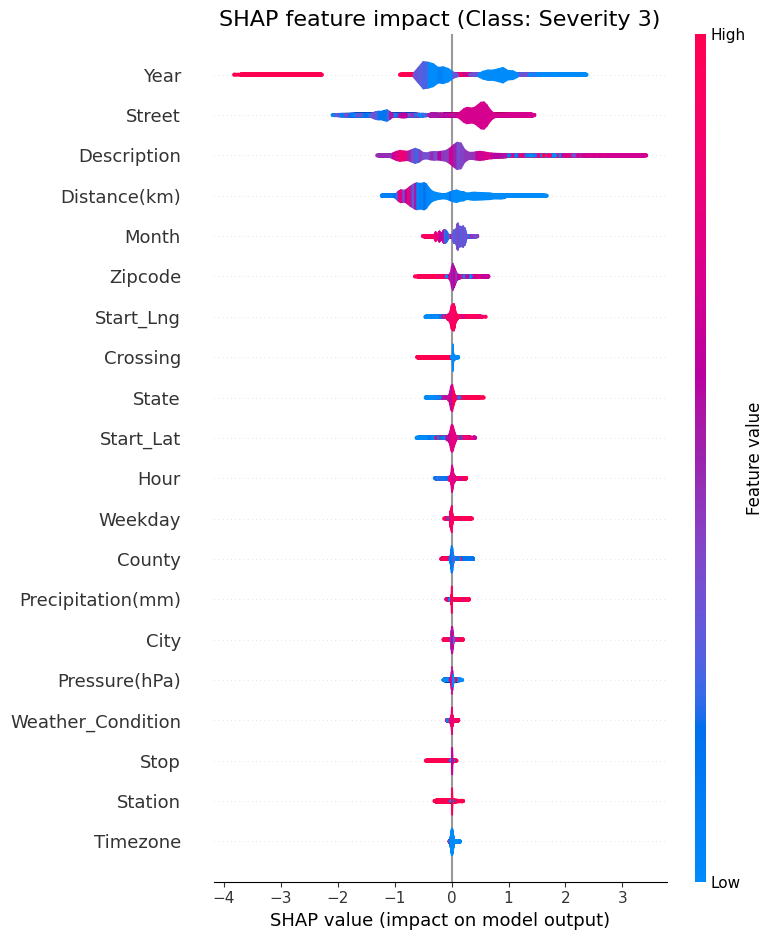

--- SHAP plot for Severity = 4 ---


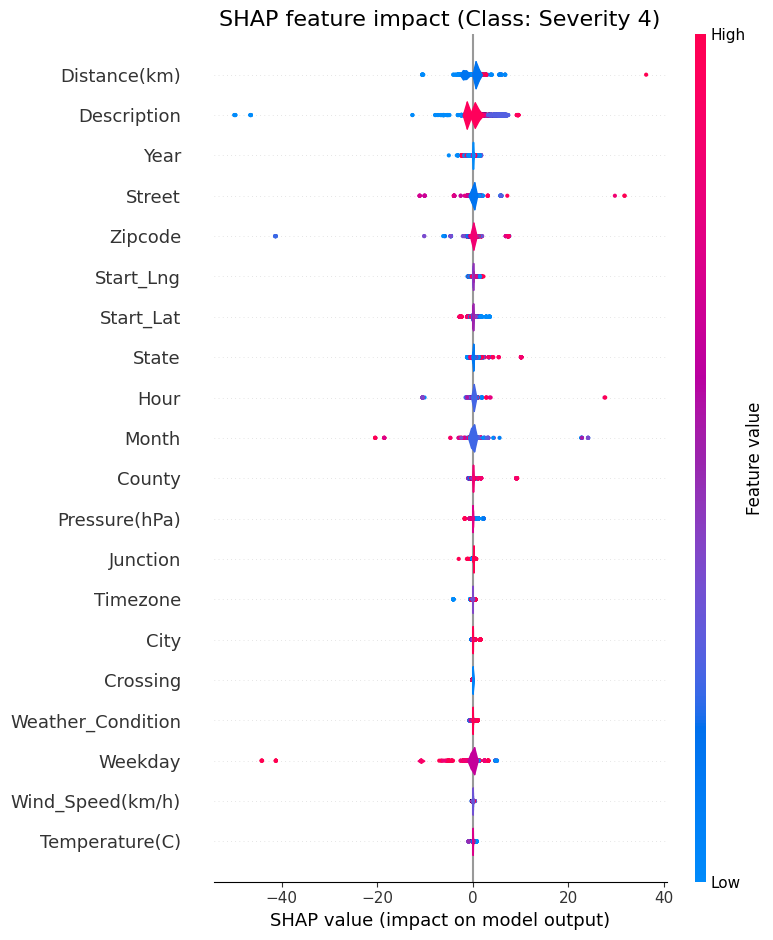

In [26]:
# shap_values -> 3D ndarray: (uzorci, feature, klase)
# X_test -> DataFrame sa karakteristikama
# lgbm_model -> trenirani LightGBM model

# Dobijanje broja klasa
num_classes = shap_values.shape[2]

# Ako model ima atribut 'classes_'
try:
    class_names = lgbm_model.classes_
except AttributeError:
    # Ako nema, samo koristi indekse
    class_names = [str(i) for i in range(num_classes)]

# --- Globalna važnost karakteristika (Bar Plot) ---
plt.title('SHAP Global importance', fontsize=16)
# Prosečne apsolutne SHAP vrednosti po svim klasama
# shape: (uzorci, feature, klase) -> srednja po uzorcima i klasama
mean_abs_shap = np.mean(np.abs(shap_values), axis=(0, 2))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.savefig('shap_global_importance.png', bbox_inches='tight')
plt.show()

# --- Violin / Beeswarm plot po klasi ---
for i, class_name in enumerate(class_names):
    print(f"--- SHAP plot for Severity = {class_name} ---")
    plt.figure()
    plt.title(f'SHAP feature impact (Class: Severity {class_name})', fontsize=16)
    
    # Za klasu i uzorke uzimamo: shap_values[:, :, i]
    shap.summary_plot(shap_values[:, :, i], X_test, plot_type="violin", show=False)
    
    plt.savefig(f'shap_violin_severity_{class_name}.png', bbox_inches='tight')
    plt.show()


SHAP Model Explanation (Dependence & Waterfall Plots)

The top 3 most important features are: ['Description', 'Month', 'Distance(km)']


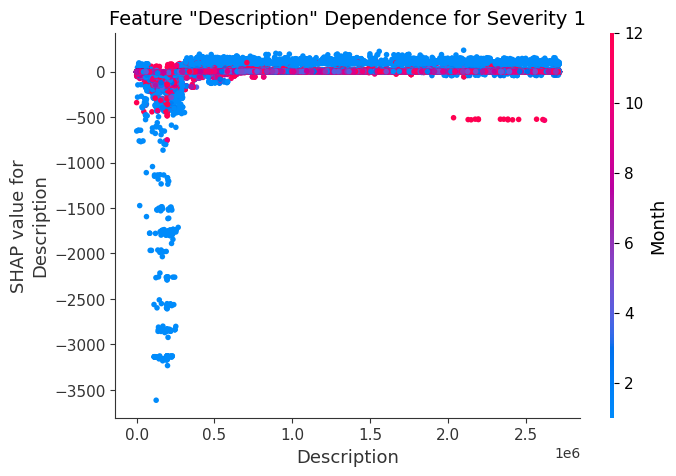

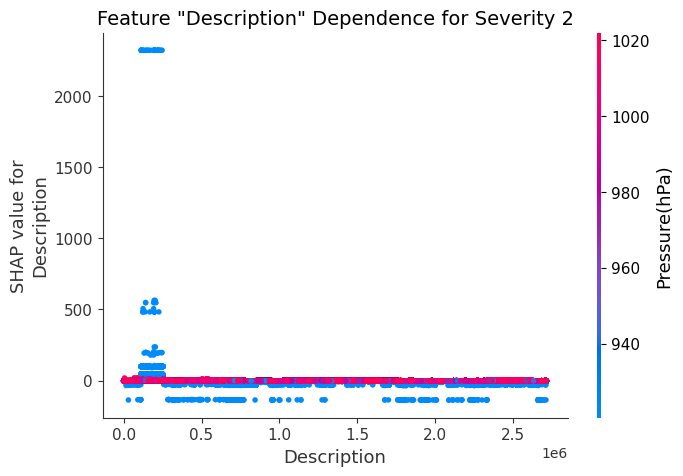

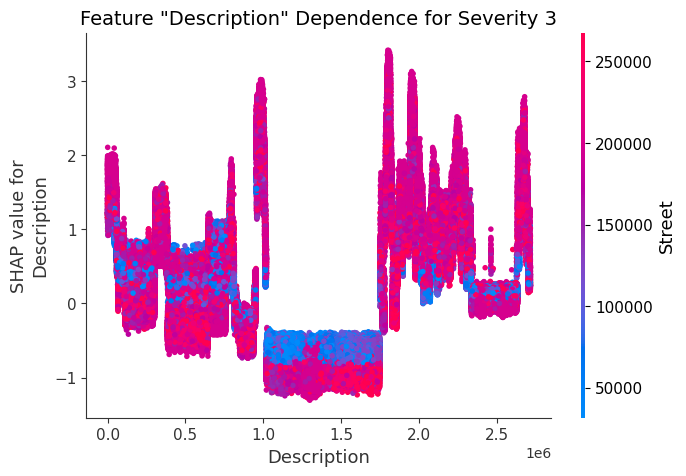

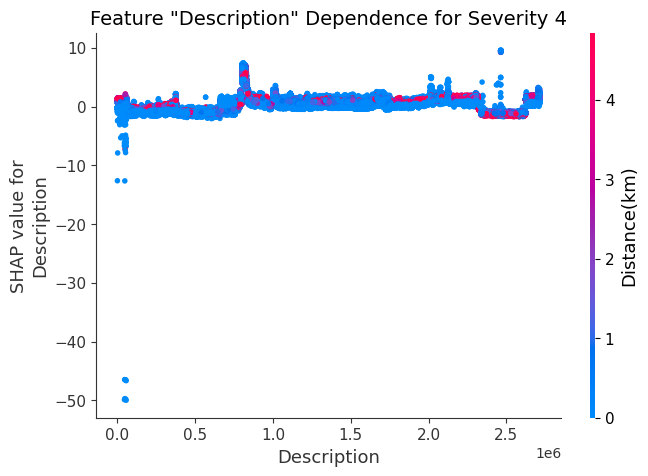

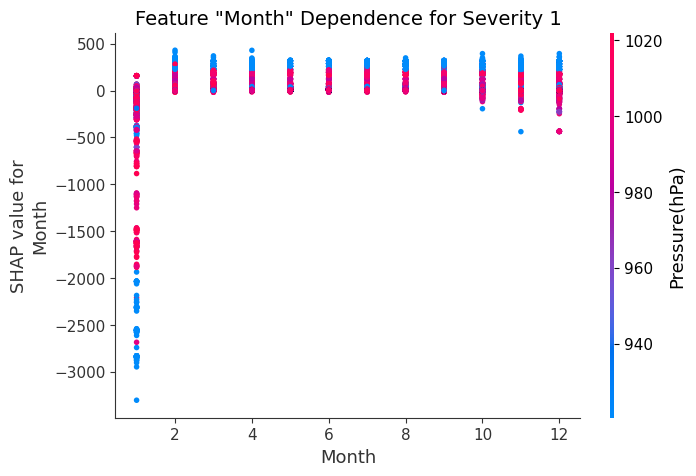

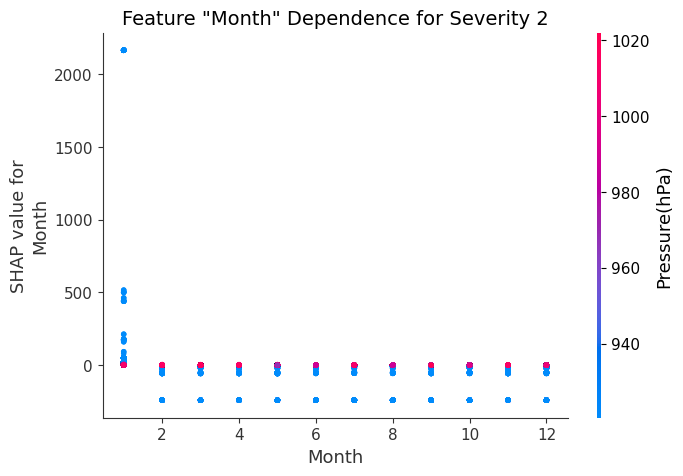

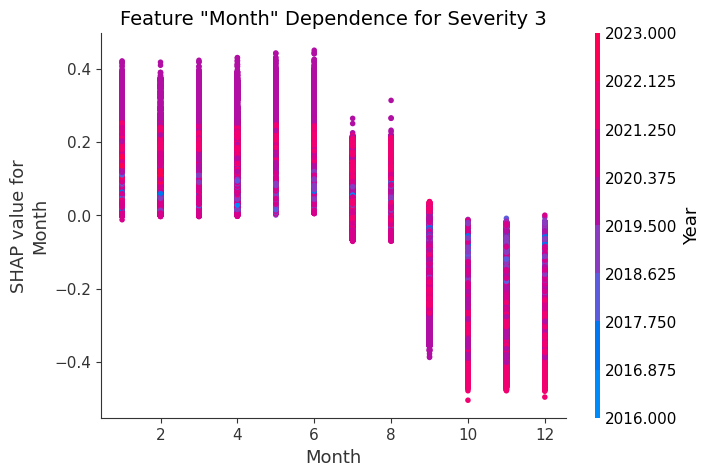

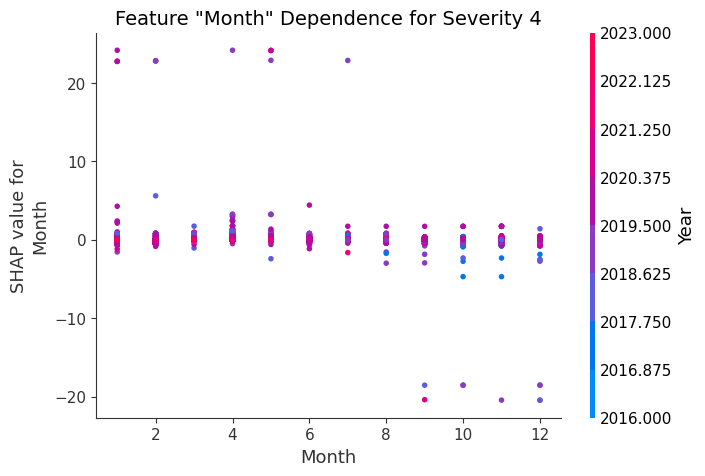

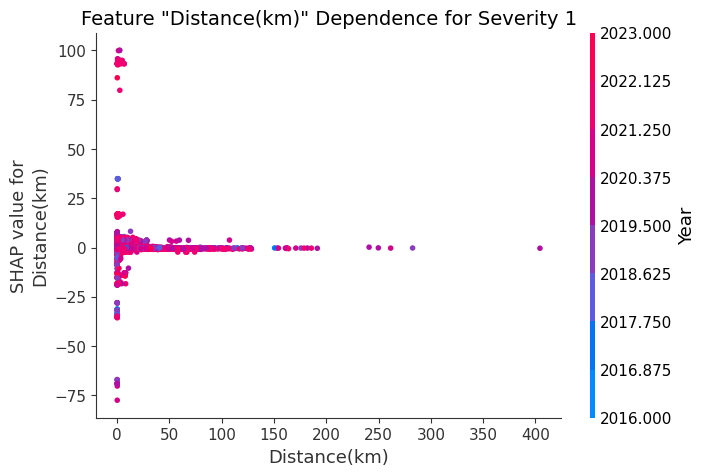

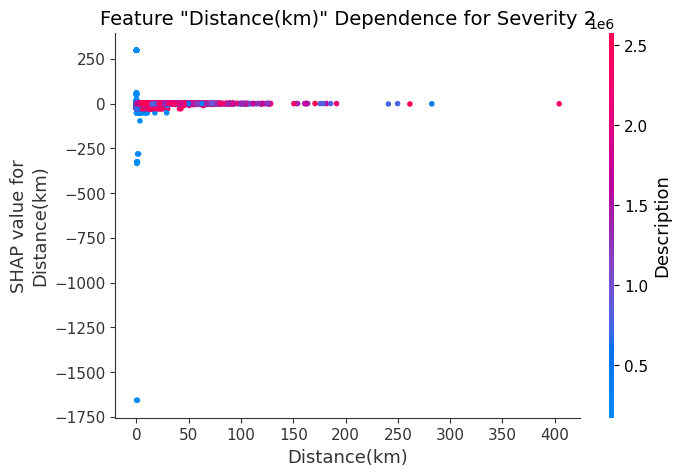

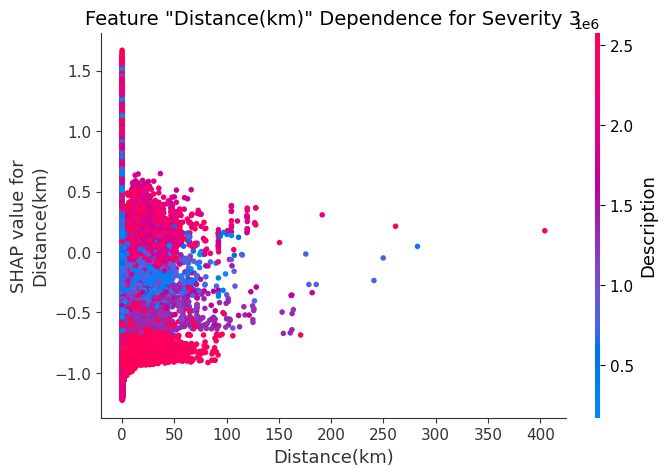

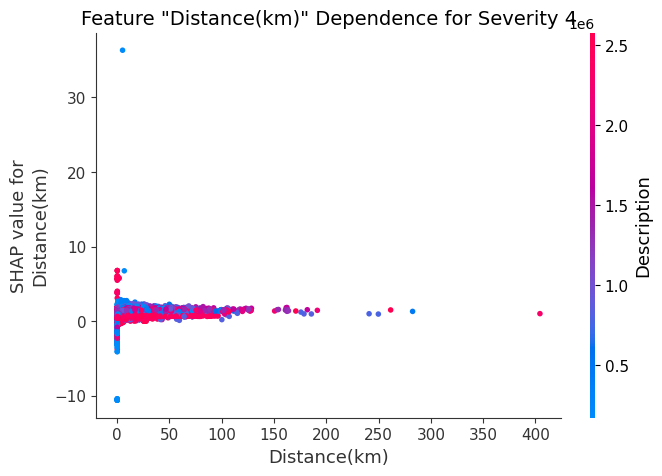


Drawing waterfall plot for a single prediction sample...
Explaining sample index: 0
True Severity of the sample: 4
Predicted probabilities: {1: 9.6278640880083e-05, 2: 0.6247773860103943, 3: 0.02986017441495266, 4: 0.345266160933773}
--- Drawing waterfall plot for sample 0, Severity = 1 ---


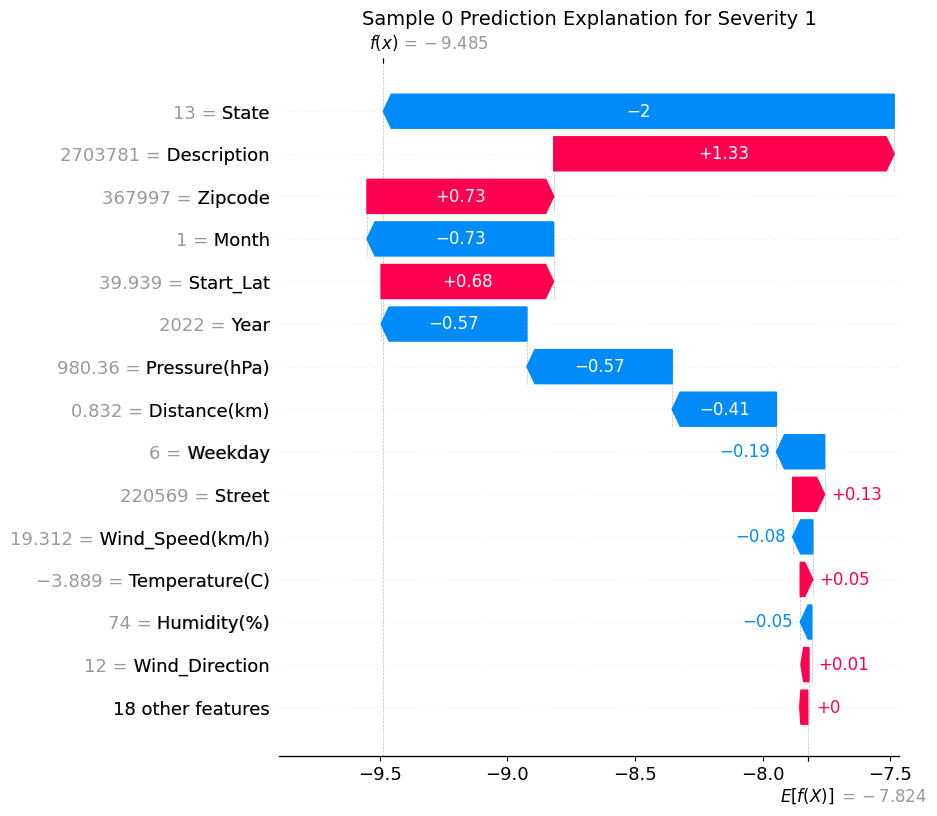

--- Drawing waterfall plot for sample 0, Severity = 2 ---


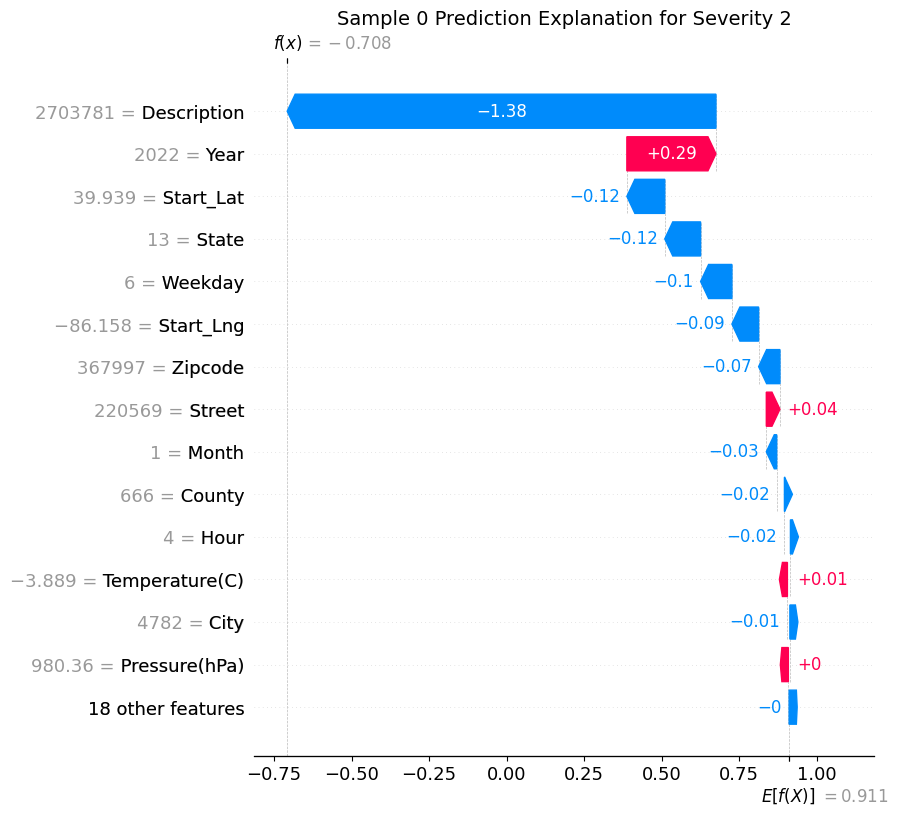

--- Drawing waterfall plot for sample 0, Severity = 3 ---


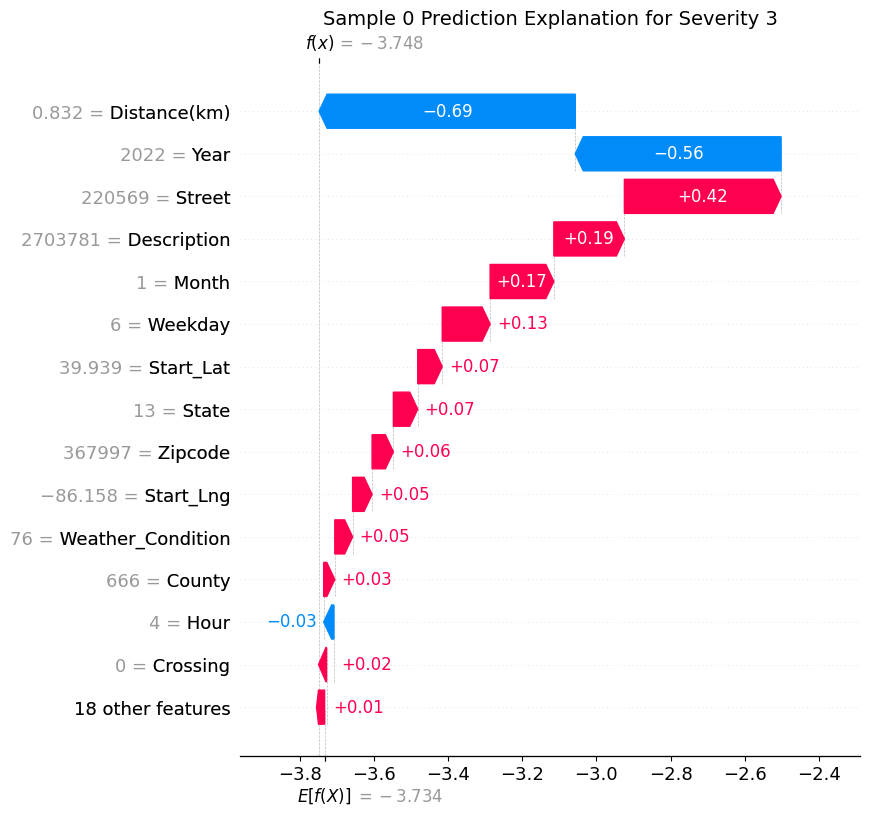

--- Drawing waterfall plot for sample 0, Severity = 4 ---


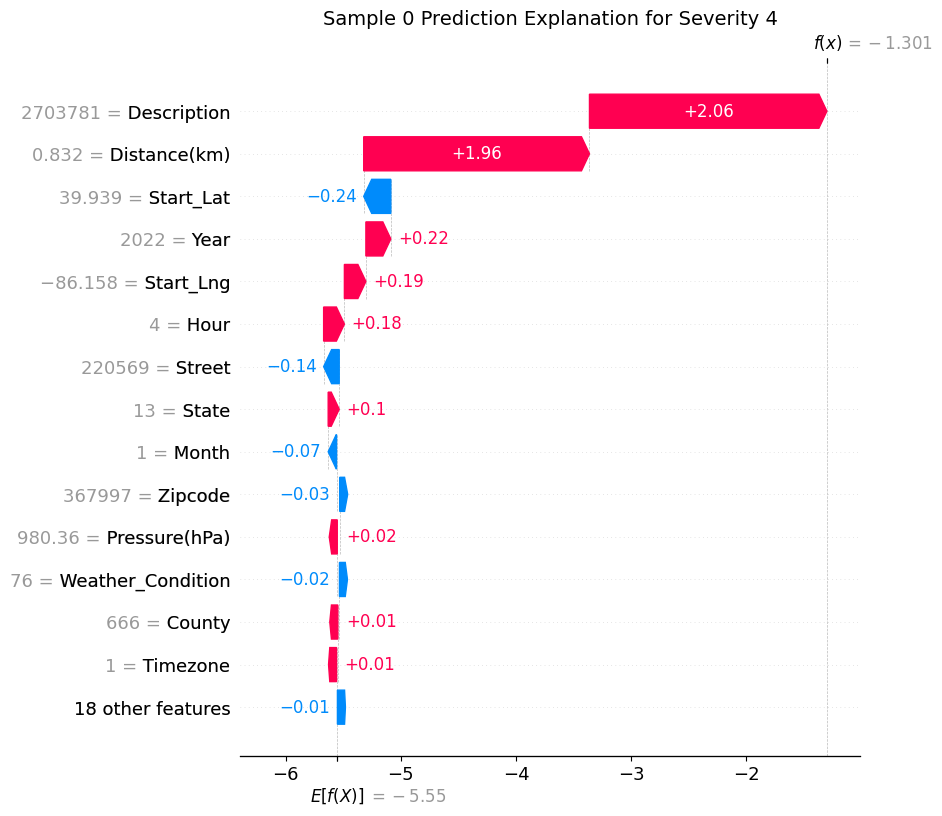

In [28]:
# --- Računanje ukupne SHAP važnosti po feature-u ---
# Ovo je kombinacija po svim klasama i uzorcima
if isinstance(shap_values, list):
    shap_sum = np.abs(shap_values[0])
    for i in range(1, len(shap_values)):
        shap_sum += np.abs(shap_values[i])
    vals = np.mean(shap_sum, axis=0)
else:
    # Za 3D ndarray: shape = (samples, features, classes)
    vals = np.mean(np.abs(shap_values), axis=(0, 2))  # prosečno po uzorcima i klasama

feature_importance = pd.DataFrame(
    list(zip(X_test.columns, vals)),
    columns=['col_name', 'feature_importance_vals']
)
feature_importance.sort_values(by='feature_importance_vals', ascending=False, inplace=True)

top_3_features = feature_importance['col_name'].head(3).tolist()
print(f"The top 3 most important features are: {top_3_features}")

# --- Dependence plots za top 3 feature po klasi ---
class_names = lgbm_model.classes_

for feature in top_3_features:
    for i, class_name in enumerate(class_names):
        # Za 3D SHAP: slice [:, :, i] uzima SHAP vrednosti za i-tu klasu
        shap.dependence_plot(
            feature,
            shap_values[:, :, i] if not isinstance(shap_values, list) else shap_values[i],
            X_test,
            interaction_index="auto",
            show=False
        )
        plt.title(f'Feature "{feature}" Dependence for Severity {class_name}', fontsize=14)
        plt.savefig(f'shap_dependence_{feature}_severity_{class_name}.png', bbox_inches='tight')
        plt.show()

# --- Waterfall plot za pojedinačni uzorak ---
print("\nDrawing waterfall plot for a single prediction sample...")

sample_index = 0  
sample_X = X_test.iloc[[sample_index]]
true_label = y_test.iloc[sample_index]
predicted_probs = lgbm_model.predict_proba(sample_X)[0]

print(f"Explaining sample index: {sample_index}")
print(f"True Severity of the sample: {true_label}")
print(f"Predicted probabilities: {dict(zip(class_names, predicted_probs))}")

# Kreiranje background dataset-a za SHAP explainer
background_data = shap.sample(X_train, 100)
explainer_for_waterfall = shap.TreeExplainer(lgbm_model, background_data)
shap_values_single = explainer_for_waterfall.shap_values(sample_X)

for i, class_name in enumerate(class_names):
    print(f"--- Drawing waterfall plot for sample {sample_index}, Severity = {class_name} ---")
    
    # Ako je lista (stara SHAP verzija)
    if isinstance(shap_values_single, list):
        shap_vals = shap_values_single[i][0]  # [0] da uzmemo prvi (i jedini) uzorak
        base_val = explainer_for_waterfall.expected_value[i]
    else:
        # 3D ndarray: shape = (1, features, classes)
        shap_vals = shap_values_single[0, :, i]  # slice po uzorku i klasi
        base_val = explainer_for_waterfall.expected_value[i]
    
    shap.waterfall_plot(shap.Explanation(
        values=shap_vals,
        base_values=base_val,
        data=sample_X.iloc[0],
        feature_names=X_test.columns.tolist()
    ), max_display=15, show=False)
    
    plt.title(f'Sample {sample_index} Prediction Explanation for Severity {class_name}', fontsize=14)
    plt.savefig(f'shap_waterfall_sample_{sample_index}_severity_{class_name}.png', bbox_inches='tight')
    plt.show()


Description je kritična karakteristika - verovatno sadrži opis nesreće koji direktno ukazuje na ozbiljnost 


Sezonalnost je važna - меsec utiče na ozbiljnost nesreća 


Distanca igra različite uloge - za lakše nesreće manje važna, za teške nesreće ključna 


Model pokazuje logične obrasce - karakteristike koje intuitivno utiču na ozbiljnost nesreće imaju najveći SHAP uticaj